# Getting Started with AuctionGym
## Effects of Bid Shading in First-Price Auctions

AuctionGym has several configuration options that detail the type of auction, how bidders behave, and how confounded the contextual information is that bidders observe. To avoid clutter, we define these in configuration files.
For the purposes of this introductory notebook, we will ignore some aspects such as repeated runs.

We parse an existing file, detailing a first-price auction with oracle bidders.
We will look into the effects of bid shading on the auctioneer's revenue, social welfare and surplus.
For this, we repeat simulated experiments with the same set of bidders, changing how their bidding strategy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from tqdm.notebook import tqdm

In [2]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DM_Oracle.json')

In [3]:
def run_repeated_auctions():
    # Placeholders for output
    auction_revenue = []
    social_welfare = []
    social_surplus = []
    
    # Instantiate Agent and Auction objects
    agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)

    # Instantiate Auction object
    auction, num_iter, rounds_per_iter, output_dir =\
        instantiate_auction(rng,
                            config,
                            agents2items,
                            agents2item_values,
                            agents,
                            max_slots,
                            embedding_size,
                            embedding_var,
                            obs_embedding_size)

    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(num_iter)):

        # Simulate impression opportunities
        for _ in range(rounds_per_iter):
            auction.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

        # Log 'Net utility' or surplus
        social_surplus.append(sum([agent.net_utility for agent in auction.agents]))
        
        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction.agents):
            agent.update(iteration=i)
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue.append(auction.revenue)
        auction.clear_revenue()
        
    # Rescale metrics per auction round
    auction_revenue = np.array(auction_revenue) / rounds_per_iter
    social_welfare = np.array(social_welfare) / rounds_per_iter
    social_surplus = np.array(social_surplus) / rounds_per_iter
    
    return auction_revenue, social_welfare, social_surplus

  0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:  46%|████▌     | 15026/32768 [00:15<00:17, 987.16it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 15026
AUC predicting P(win):				 0.7809701216489132


Oracle, DM (search) 2:  34%|███▍      | 11257/32768 [00:11<00:22, 970.23it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 11257
AUC predicting P(win):				 0.7450267004180973


Oracle, DM (search) 3:  54%|█████▍    | 17718/32768 [00:19<00:16, 915.05it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 17718
AUC predicting P(win):				 0.6351045933810415


Oracle, DM (search) 4:  45%|████▍     | 14589/32768 [00:15<00:19, 927.61it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 14589
AUC predicting P(win):				 0.7514957601790511


Oracle, DM (search) 5:  47%|████▋     | 15391/32768 [00:16<00:18, 918.89it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 15391
AUC predicting P(win):				 0.7534085405570888


Oracle, DM (search) 6:  76%|███████▋  | 24995/32768 [00:26<00:08, 957.66it/s] 


Stopping at Epoch 24995
AUC predicting P(win):				 0.7345205181930631


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:  26%|██▌       | 8367/32768 [00:08<00:25, 965.13it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 8367
AUC predicting P(win):				 0.776562216826228


Oracle, DM (search) 2:  24%|██▍       | 7875/32768 [00:08<00:26, 924.29it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 7875
AUC predicting P(win):				 0.7527280589241294


Oracle, DM (search) 3:  27%|██▋       | 8867/32768 [00:09<00:25, 950.40it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 8867
AUC predicting P(win):				 0.6485814913002959


Oracle, DM (search) 4:  37%|███▋      | 12188/32768 [00:13<00:22, 915.51it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 12188
AUC predicting P(win):				 0.7616619963003066


Oracle, DM (search) 5:  20%|█▉        | 6543/32768 [00:06<00:26, 990.46it/s] 


Stopping at Epoch 6543


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.731661733528538


Oracle, DM (search) 6:  25%|██▌       | 8192/32768 [00:09<00:27, 895.11it/s]


Stopping at Epoch 8192
AUC predicting P(win):				 0.7194399635830284


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:  13%|█▎        | 4382/32768 [00:05<00:32, 873.39it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4382
AUC predicting P(win):				 0.7710310626702997


Oracle, DM (search) 2:  13%|█▎        | 4347/32768 [00:04<00:29, 949.12it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4347
AUC predicting P(win):				 0.7406741470354158


Oracle, DM (search) 3:  14%|█▍        | 4680/32768 [00:05<00:30, 913.69it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4680
AUC predicting P(win):				 0.6910236272052941


Oracle, DM (search) 4:  17%|█▋        | 5622/32768 [00:06<00:29, 924.70it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 5622
AUC predicting P(win):				 0.7278773385824888


Oracle, DM (search) 5:  15%|█▍        | 4799/32768 [00:05<00:30, 910.18it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4799
AUC predicting P(win):				 0.7390131685916532


Oracle, DM (search) 6:  11%|█         | 3595/32768 [00:03<00:30, 942.36it/s]


Stopping at Epoch 3595
AUC predicting P(win):				 0.7352947931484116


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 1069/32768 [00:01<00:29, 1063.99it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1069
AUC predicting P(win):				 0.7592516861657362


Oracle, DM (search) 2:  11%|█         | 3569/32768 [00:03<00:27, 1067.54it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3569
AUC predicting P(win):				 0.7631181251916159


Oracle, DM (search) 3:   4%|▍         | 1363/32768 [00:01<00:28, 1102.39it/s]
/home/jovyan/MGTA 451/auction-gym/src/Bidder.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1363
AUC predicting P(win):				 0.7045999042568185


Oracle, DM (search) 4:   8%|▊         | 2482/32768 [00:02<00:28, 1077.74it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2482
AUC predicting P(win):				 0.7092630532833881


Oracle, DM (search) 5:   9%|▉         | 2939/32768 [00:02<00:29, 996.29it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2939
AUC predicting P(win):				 0.7357795017208466


Oracle, DM (search) 6:   4%|▍         | 1471/32768 [00:01<00:30, 1042.80it/s]


Stopping at Epoch 1471
AUC predicting P(win):				 0.7509045046881369


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   7%|▋         | 2207/32768 [00:02<00:30, 1011.70it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2207
AUC predicting P(win):				 0.7890871406360589


Oracle, DM (search) 2:   3%|▎         | 907/32768 [00:00<00:29, 1093.63it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 907
AUC predicting P(win):				 0.7212820964804042


Oracle, DM (search) 3:   6%|▌         | 1879/32768 [00:01<00:30, 1015.13it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1879
AUC predicting P(win):				 0.6872629883643075


Oracle, DM (search) 4:   7%|▋         | 2289/32768 [00:02<00:29, 1047.23it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2289
AUC predicting P(win):				 0.7500513172934995


Oracle, DM (search) 5:   8%|▊         | 2695/32768 [00:02<00:30, 985.23it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2695
AUC predicting P(win):				 0.729047688477154


Oracle, DM (search) 6:   3%|▎         | 1011/32768 [00:01<00:34, 922.82it/s]


Stopping at Epoch 1011
AUC predicting P(win):				 0.7168403638628802


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 847/32768 [00:00<00:32, 993.88it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 847
AUC predicting P(win):				 0.7499768030097793


Oracle, DM (search) 2:   3%|▎         | 1126/32768 [00:01<00:32, 985.82it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1126
AUC predicting P(win):				 0.7503222746400624


Oracle, DM (search) 3:   4%|▎         | 1223/32768 [00:01<00:32, 973.38it/s]


Stopping at Epoch 1223


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.6972174106306203


Oracle, DM (search) 4:   3%|▎         | 843/32768 [00:00<00:35, 889.11it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 843
AUC predicting P(win):				 0.6970841537080938


Oracle, DM (search) 5:   3%|▎         | 882/32768 [00:00<00:30, 1049.91it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 882
AUC predicting P(win):				 0.7462974665364509


Oracle, DM (search) 6:   5%|▍         | 1594/32768 [00:01<00:32, 965.97it/s]


Stopping at Epoch 1594
AUC predicting P(win):				 0.7552259226448779


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 972/32768 [00:00<00:32, 977.90it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 972
AUC predicting P(win):				 0.7974520671747027


Oracle, DM (search) 2:   2%|▏         | 734/32768 [00:00<00:32, 993.63it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 734
AUC predicting P(win):				 0.7301818879392596


Oracle, DM (search) 3:   3%|▎         | 1023/32768 [00:01<00:33, 937.39it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1023
AUC predicting P(win):				 0.6829615494799423


Oracle, DM (search) 4:   2%|▏         | 684/32768 [00:00<00:31, 1005.63it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 684
AUC predicting P(win):				 0.7082899742490448


Oracle, DM (search) 5:   4%|▍         | 1437/32768 [00:01<00:33, 935.97it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1437
AUC predicting P(win):				 0.7522123630247979


Oracle, DM (search) 6:   2%|▏         | 715/32768 [00:00<00:33, 954.58it/s] 


Stopping at Epoch 715
AUC predicting P(win):				 0.7215105660520662


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 907/32768 [00:00<00:30, 1040.71it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 907
AUC predicting P(win):				 0.7472045764730226


Oracle, DM (search) 2:   2%|▏         | 752/32768 [00:00<00:33, 962.19it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 752
AUC predicting P(win):				 0.7532978686653358


Oracle, DM (search) 3:   3%|▎         | 833/32768 [00:00<00:33, 965.07it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 833
AUC predicting P(win):				 0.7042673491525953


Oracle, DM (search) 4:   3%|▎         | 948/32768 [00:00<00:30, 1031.46it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 948
AUC predicting P(win):				 0.7007908991453101


Oracle, DM (search) 5:   3%|▎         | 958/32768 [00:00<00:32, 993.59it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 958
AUC predicting P(win):				 0.7623078307942113


Oracle, DM (search) 6:   2%|▏         | 632/32768 [00:00<00:32, 1002.75it/s]


Stopping at Epoch 632
AUC predicting P(win):				 0.7293377026434129


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 797/32768 [00:00<00:34, 938.81it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 797
AUC predicting P(win):				 0.7862850829824777


Oracle, DM (search) 2:   3%|▎         | 916/32768 [00:00<00:32, 985.77it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 916
AUC predicting P(win):				 0.7318053484959414


Oracle, DM (search) 3:   3%|▎         | 1008/32768 [00:00<00:30, 1031.21it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1008
AUC predicting P(win):				 0.6882171128781988


Oracle, DM (search) 4:   3%|▎         | 895/32768 [00:00<00:32, 988.84it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 895
AUC predicting P(win):				 0.7500267127920933


Oracle, DM (search) 5:   3%|▎         | 897/32768 [00:00<00:30, 1042.12it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 897
AUC predicting P(win):				 0.7239988049210918


Oracle, DM (search) 6:   2%|▏         | 736/32768 [00:00<00:33, 949.03it/s]


Stopping at Epoch 736
AUC predicting P(win):				 0.730392491737546


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 788/32768 [00:00<00:32, 976.06it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 788
AUC predicting P(win):				 0.7620454519151202


Oracle, DM (search) 2:   3%|▎         | 980/32768 [00:00<00:31, 1004.67it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 980
AUC predicting P(win):				 0.7599978505409472


Oracle, DM (search) 3:   3%|▎         | 839/32768 [00:00<00:32, 971.53it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 839
AUC predicting P(win):				 0.7031610271221089


Oracle, DM (search) 4:   3%|▎         | 871/32768 [00:00<00:30, 1057.03it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 871
AUC predicting P(win):				 0.6799379424327897


Oracle, DM (search) 5:   2%|▏         | 662/32768 [00:00<00:33, 951.80it/s]


Stopping at Epoch 662


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.7535151586637786


Oracle, DM (search) 6:   3%|▎         | 863/32768 [00:00<00:31, 1028.70it/s]


Stopping at Epoch 863
AUC predicting P(win):				 0.7385186450151702


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 641/32768 [00:00<00:33, 969.62it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 641
AUC predicting P(win):				 0.7691863938038561


Oracle, DM (search) 2:   3%|▎         | 923/32768 [00:00<00:31, 1014.16it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 923
AUC predicting P(win):				 0.736018649594232


Oracle, DM (search) 3:   3%|▎         | 880/32768 [00:00<00:32, 993.07it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 880
AUC predicting P(win):				 0.7030560677241193


Oracle, DM (search) 4:   3%|▎         | 837/32768 [00:00<00:31, 1027.75it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 837
AUC predicting P(win):				 0.730190974944338


Oracle, DM (search) 5:   3%|▎         | 1039/32768 [00:00<00:30, 1043.55it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1039
AUC predicting P(win):				 0.7241298701298701


Oracle, DM (search) 6:   3%|▎         | 848/32768 [00:00<00:32, 975.40it/s]


Stopping at Epoch 848
AUC predicting P(win):				 0.7136044482900468


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 654/32768 [00:00<00:32, 991.89it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 654
AUC predicting P(win):				 0.7661689421330025


Oracle, DM (search) 2:   2%|▏         | 647/32768 [00:00<00:31, 1012.35it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 647
AUC predicting P(win):				 0.7584340453641388


Oracle, DM (search) 3:   3%|▎         | 1044/32768 [00:01<00:32, 970.09it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1044
AUC predicting P(win):				 0.6604907377222221


Oracle, DM (search) 4:   2%|▏         | 745/32768 [00:00<00:33, 952.61it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 745
AUC predicting P(win):				 0.6996681530070755


Oracle, DM (search) 5:   2%|▏         | 721/32768 [00:00<00:30, 1035.40it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 721
AUC predicting P(win):				 0.7596803516574291


Oracle, DM (search) 6:   2%|▏         | 624/32768 [00:00<00:31, 1013.91it/s]


Stopping at Epoch 624
AUC predicting P(win):				 0.7268803038611389


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 782/32768 [00:00<00:31, 1023.87it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 782
AUC predicting P(win):				 0.7806031662269128


Oracle, DM (search) 2:   3%|▎         | 938/32768 [00:00<00:31, 1008.47it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 938
AUC predicting P(win):				 0.7286116133278913


Oracle, DM (search) 3:   3%|▎         | 1053/32768 [00:01<00:31, 1014.26it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1053
AUC predicting P(win):				 0.7179221435793732


Oracle, DM (search) 4:   2%|▏         | 763/32768 [00:00<00:32, 971.21it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 763
AUC predicting P(win):				 0.7283064480956031


Oracle, DM (search) 5:   2%|▏         | 800/32768 [00:00<00:34, 915.79it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 800
AUC predicting P(win):				 0.7221627557727544


Oracle, DM (search) 6:   2%|▏         | 793/32768 [00:00<00:32, 984.68it/s] 


Stopping at Epoch 793
AUC predicting P(win):				 0.7272593493414026


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 852/32768 [00:00<00:32, 979.96it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 852
AUC predicting P(win):				 0.7527958569478269


Oracle, DM (search) 2:   3%|▎         | 925/32768 [00:00<00:31, 1008.92it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 925
AUC predicting P(win):				 0.7759160280619508


Oracle, DM (search) 3:   3%|▎         | 1129/32768 [00:01<00:32, 985.94it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1129
AUC predicting P(win):				 0.6884857703454359


Oracle, DM (search) 4:   2%|▏         | 757/32768 [00:00<00:32, 1000.01it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 757
AUC predicting P(win):				 0.6970562056398967


Oracle, DM (search) 5:   3%|▎         | 852/32768 [00:00<00:34, 926.27it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 852
AUC predicting P(win):				 0.7519215470376625


Oracle, DM (search) 6:   2%|▏         | 582/32768 [00:00<00:38, 829.76it/s]


Stopping at Epoch 582
AUC predicting P(win):				 0.7324637783039416


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 768/32768 [00:00<00:32, 988.85it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 768
AUC predicting P(win):				 0.7839789768672616


Oracle, DM (search) 2:   3%|▎         | 1024/32768 [00:01<00:31, 1016.81it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1024
AUC predicting P(win):				 0.7172428460074052


Oracle, DM (search) 3:   3%|▎         | 1112/32768 [00:01<00:32, 984.36it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1112
AUC predicting P(win):				 0.6912450538620925


Oracle, DM (search) 4:   2%|▏         | 639/32768 [00:00<00:34, 918.85it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 639
AUC predicting P(win):				 0.7214586156326406


Oracle, DM (search) 5:   3%|▎         | 847/32768 [00:00<00:30, 1030.18it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 847
AUC predicting P(win):				 0.7475758163283562


Oracle, DM (search) 6:   2%|▏         | 729/32768 [00:00<00:33, 970.52it/s] 


Stopping at Epoch 729
AUC predicting P(win):				 0.7384091603336078


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 787/32768 [00:00<00:33, 961.69it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 787
AUC predicting P(win):				 0.7659234635648735


Oracle, DM (search) 2:   2%|▏         | 786/32768 [00:00<00:32, 981.63it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 786
AUC predicting P(win):				 0.758499241029389


Oracle, DM (search) 3:   2%|▏         | 691/32768 [00:00<00:33, 967.46it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 691
AUC predicting P(win):				 0.7051800077554523


Oracle, DM (search) 4:   2%|▏         | 666/32768 [00:00<00:33, 947.57it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 666
AUC predicting P(win):				 0.7157729140938127


Oracle, DM (search) 5:   2%|▏         | 786/32768 [00:00<00:32, 972.02it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 786
AUC predicting P(win):				 0.7432565207479297


Oracle, DM (search) 6:   2%|▏         | 581/32768 [00:00<00:32, 977.59it/s] 


Stopping at Epoch 581
AUC predicting P(win):				 0.7298279104222463


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 580/32768 [00:00<00:34, 943.31it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 580
AUC predicting P(win):				 0.7649928074918111


Oracle, DM (search) 2:   3%|▎         | 823/32768 [00:00<00:31, 1004.82it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 823
AUC predicting P(win):				 0.7416612753260436


Oracle, DM (search) 3:   3%|▎         | 933/32768 [00:00<00:33, 956.39it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 933
AUC predicting P(win):				 0.6904680286401459


Oracle, DM (search) 4:   3%|▎         | 894/32768 [00:00<00:32, 988.32it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 894
AUC predicting P(win):				 0.7391602272331831


Oracle, DM (search) 5:   3%|▎         | 1056/32768 [00:01<00:32, 969.55it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1056
AUC predicting P(win):				 0.7552314820229712


Oracle, DM (search) 6:   2%|▏         | 595/32768 [00:00<00:30, 1069.67it/s]


Stopping at Epoch 595
AUC predicting P(win):				 0.7267948159951656


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 642/32768 [00:00<00:32, 985.65it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 642
AUC predicting P(win):				 0.7742429961809543


Oracle, DM (search) 2:   2%|▏         | 592/32768 [00:00<00:32, 995.23it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 592
AUC predicting P(win):				 0.7507473009509085


Oracle, DM (search) 3:   2%|▏         | 776/32768 [00:00<00:33, 953.80it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 776
AUC predicting P(win):				 0.7010837530811275


Oracle, DM (search) 4:   2%|▏         | 724/32768 [00:00<00:31, 1019.20it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 724
AUC predicting P(win):				 0.6949643285312789


Oracle, DM (search) 5:   2%|▏         | 619/32768 [00:00<00:37, 848.17it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 619
AUC predicting P(win):				 0.7429466480086455


Oracle, DM (search) 6:   2%|▏         | 657/32768 [00:00<00:34, 924.43it/s]


Stopping at Epoch 657
AUC predicting P(win):				 0.7361506783474975


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 741/32768 [00:00<00:32, 970.53it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 741
AUC predicting P(win):				 0.765757749790364


Oracle, DM (search) 2:   2%|▏         | 756/32768 [00:00<00:30, 1045.22it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 756
AUC predicting P(win):				 0.7350868047770653


Oracle, DM (search) 3:   3%|▎         | 943/32768 [00:00<00:30, 1054.40it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 943
AUC predicting P(win):				 0.6721196711395865


Oracle, DM (search) 4:   3%|▎         | 865/32768 [00:00<00:32, 996.16it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 865
AUC predicting P(win):				 0.7501459404878357


Oracle, DM (search) 5:   2%|▏         | 764/32768 [00:00<00:32, 999.16it/s] 
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 764
AUC predicting P(win):				 0.7548251877988504


Oracle, DM (search) 6:   2%|▏         | 728/32768 [00:00<00:33, 959.23it/s] 


Stopping at Epoch 728
AUC predicting P(win):				 0.7107443938917406


/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 747/32768 [00:00<00:31, 1031.43it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 747
AUC predicting P(win):				 0.7685589795637644


Oracle, DM (search) 2:   3%|▎         | 829/32768 [00:00<00:31, 1019.89it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 829
AUC predicting P(win):				 0.751866405775953


Oracle, DM (search) 3:   4%|▍         | 1236/32768 [00:01<00:30, 1019.19it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1236
AUC predicting P(win):				 0.719819503762822


Oracle, DM (search) 4:   2%|▏         | 810/32768 [00:00<00:31, 1010.75it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 810
AUC predicting P(win):				 0.6794758399666286


Oracle, DM (search) 5:   2%|▏         | 746/32768 [00:00<00:31, 1002.83it/s]
/opt/conda/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 746
AUC predicting P(win):				 0.7367010517060831


Oracle, DM (search) 6:   3%|▎         | 978/32768 [00:01<00:33, 942.81it/s]


Stopping at Epoch 978
AUC predicting P(win):				 0.736535628831512


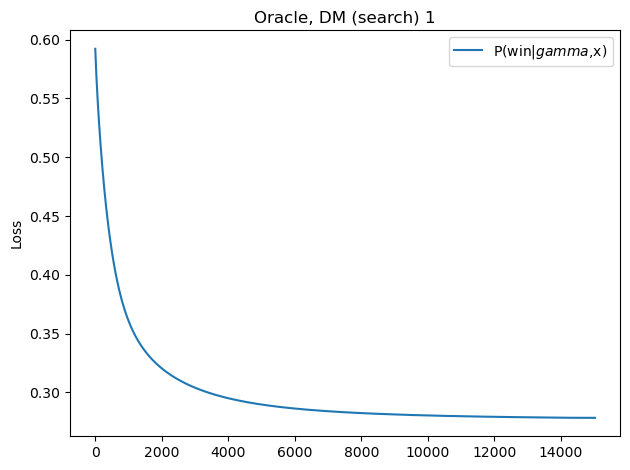

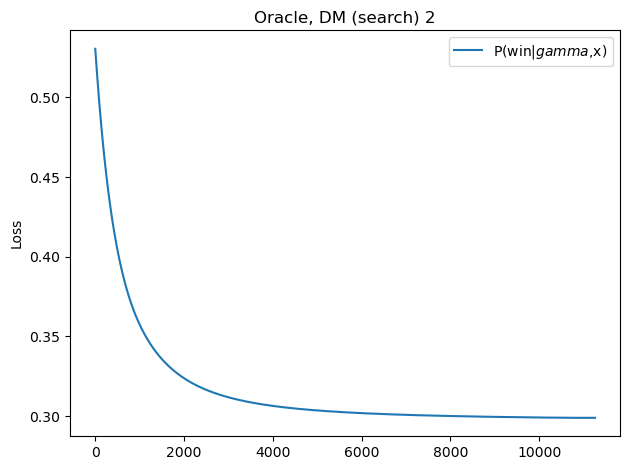

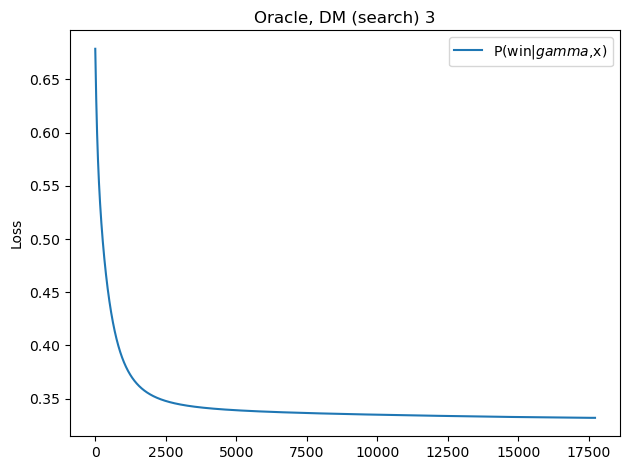

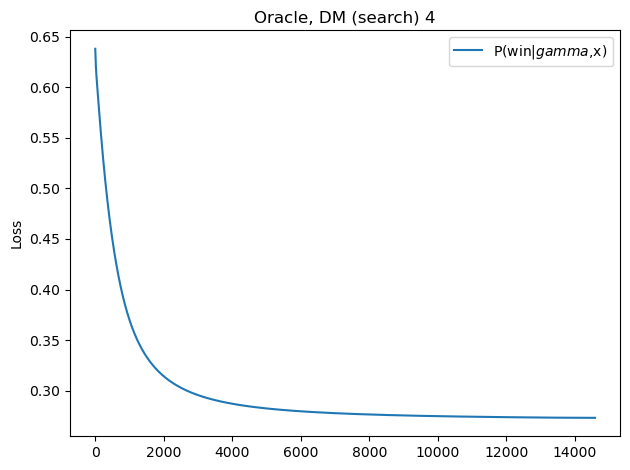

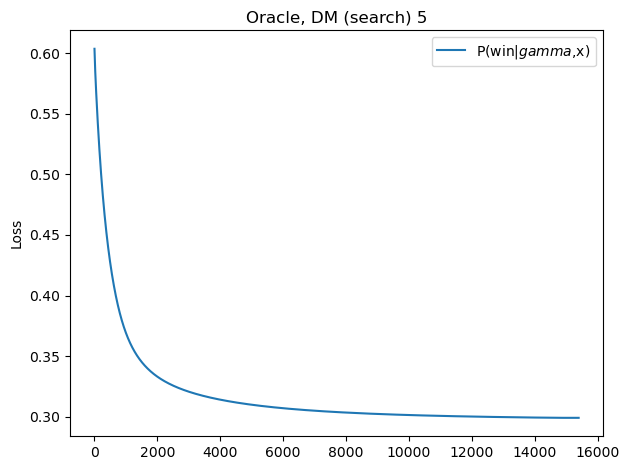

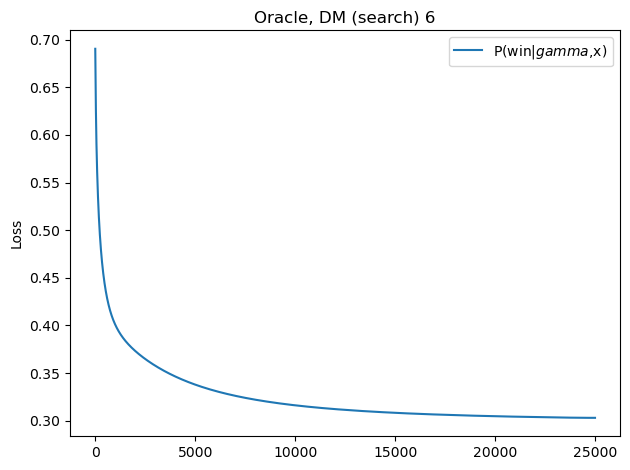

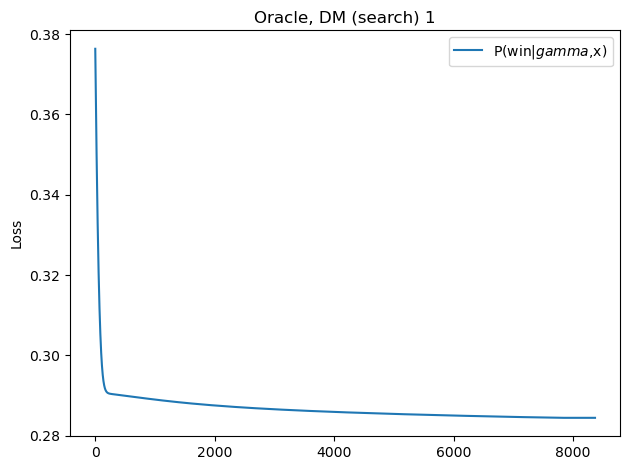

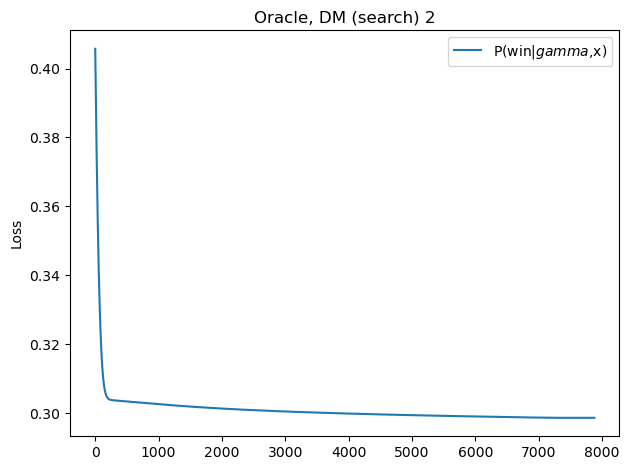

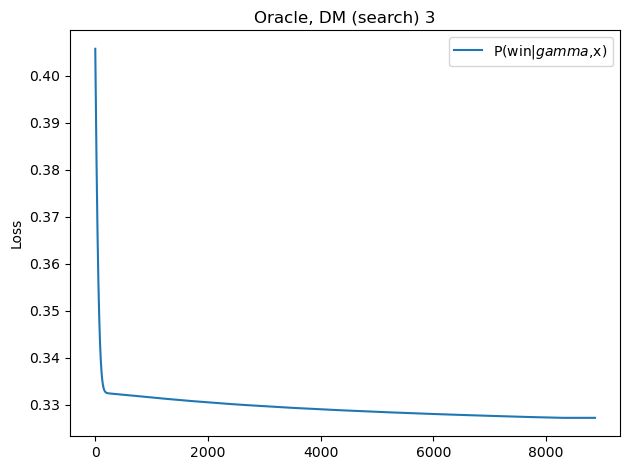

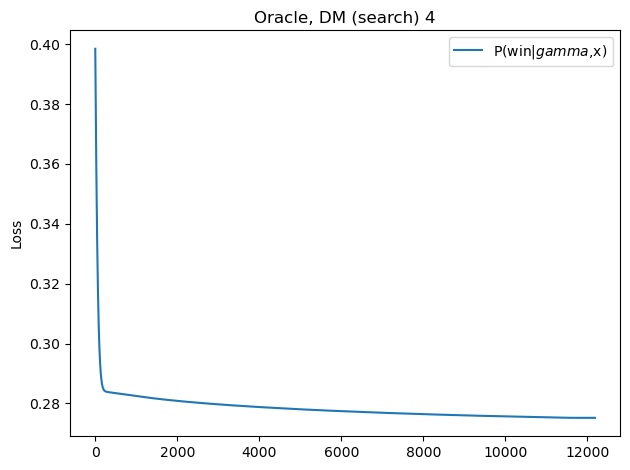

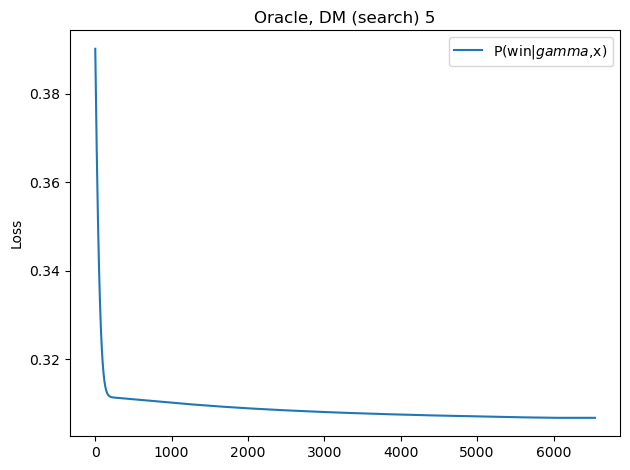

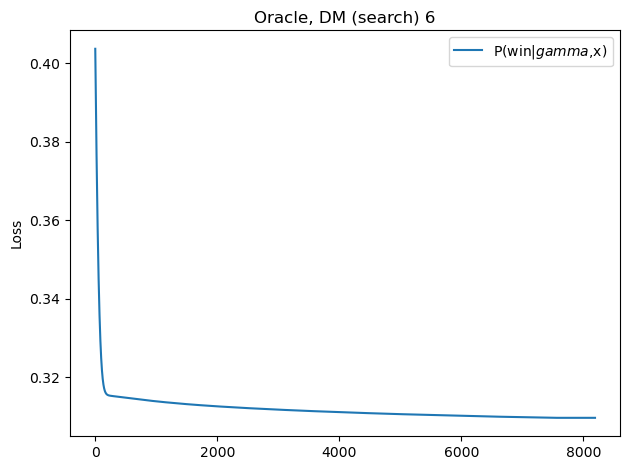

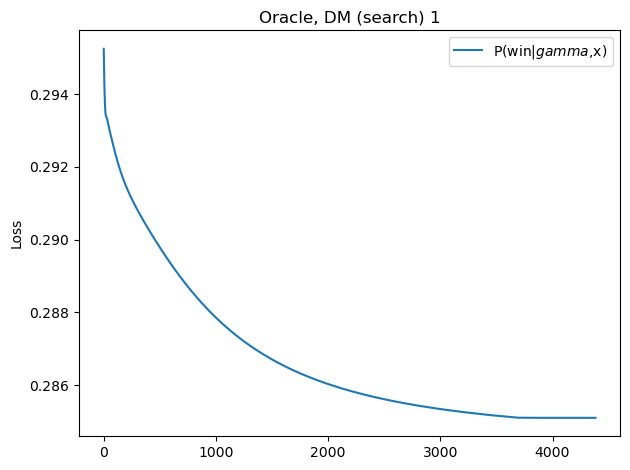

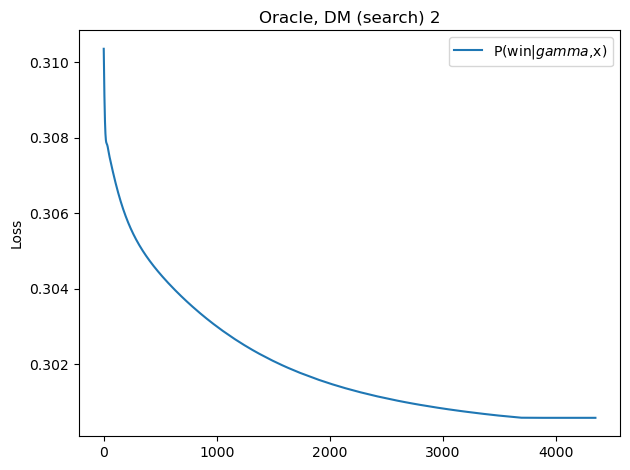

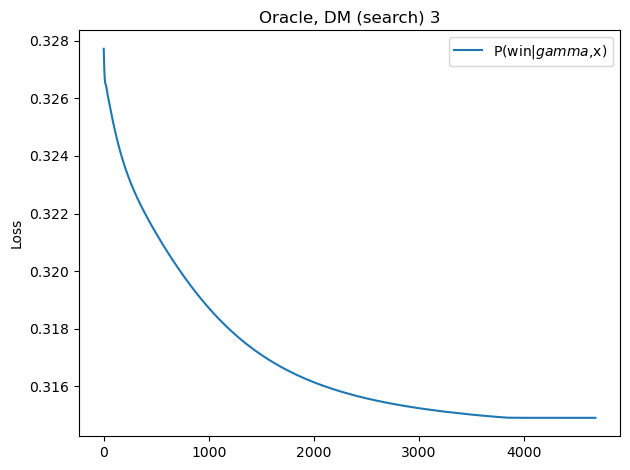

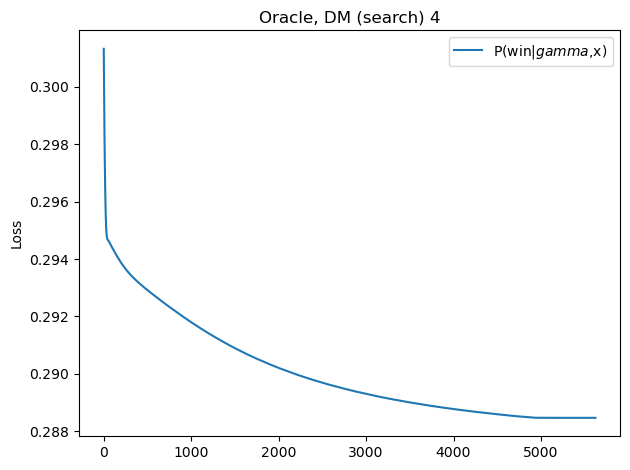

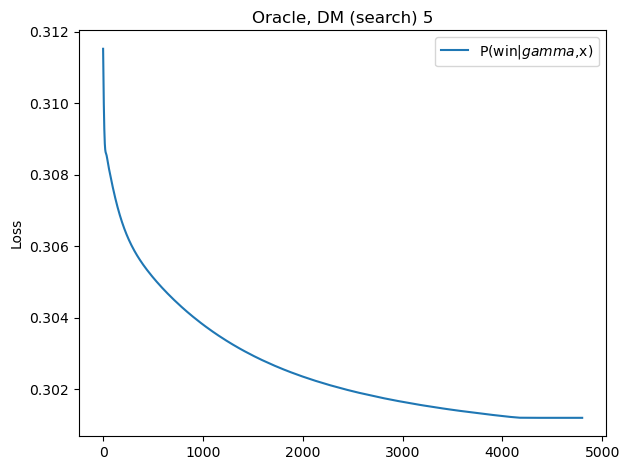

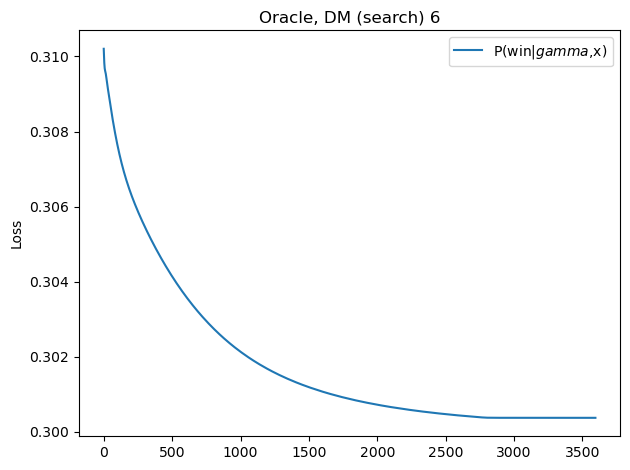

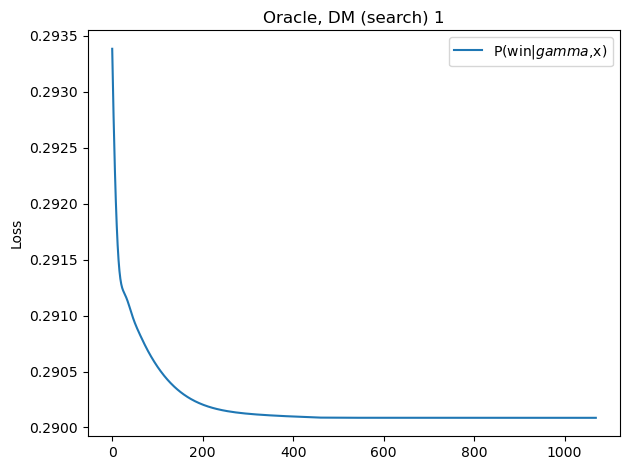

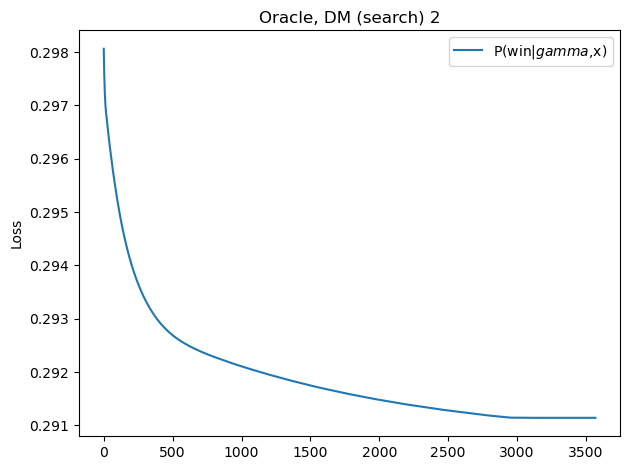

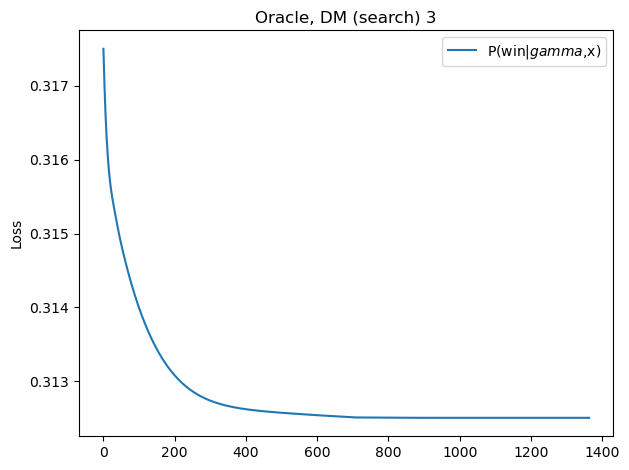

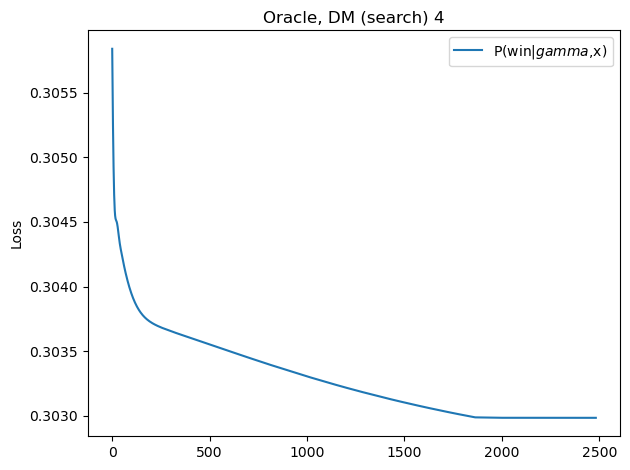

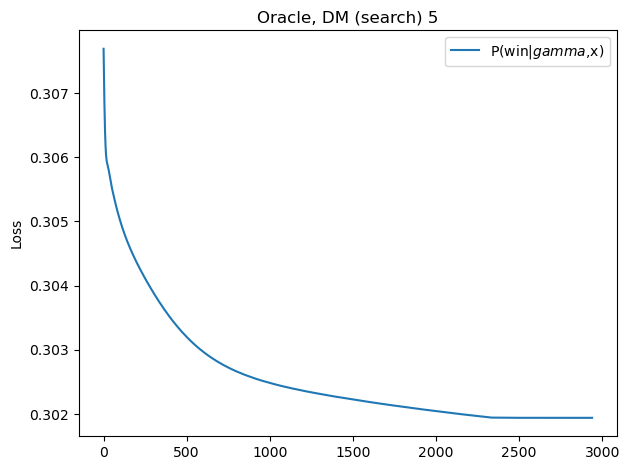

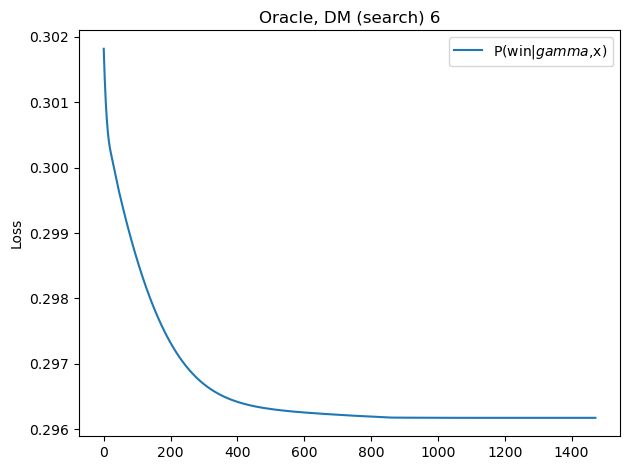

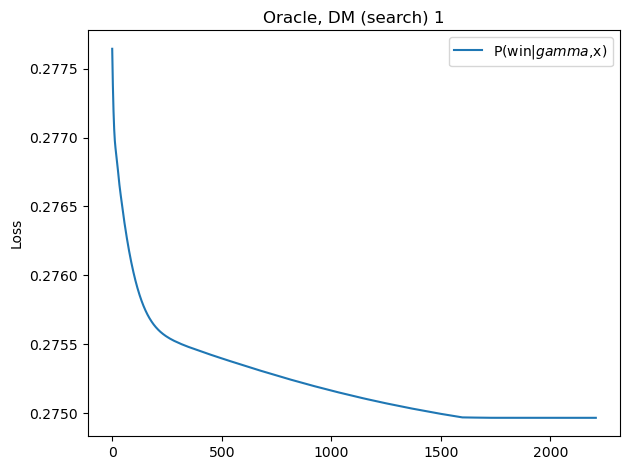

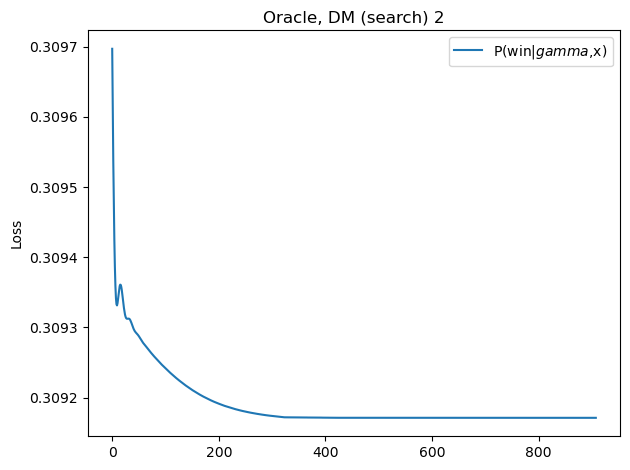

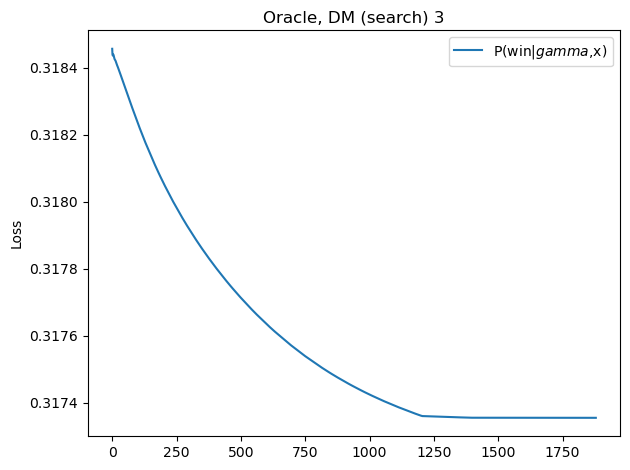

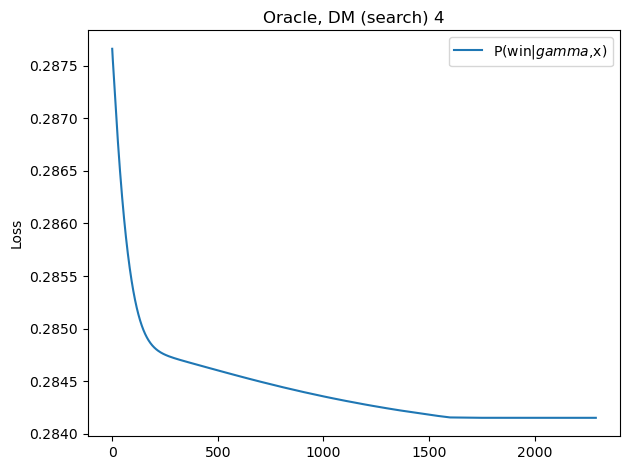

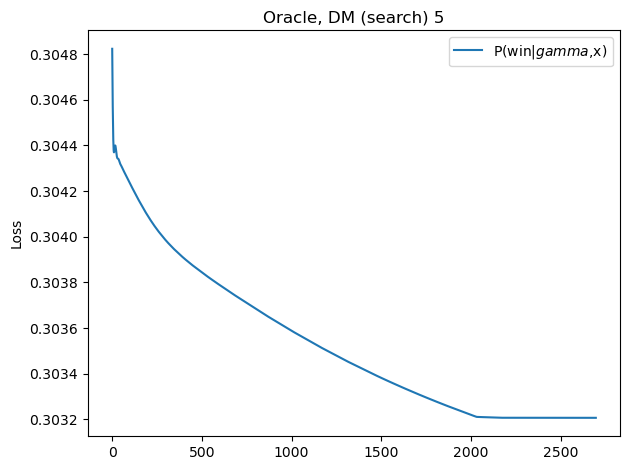

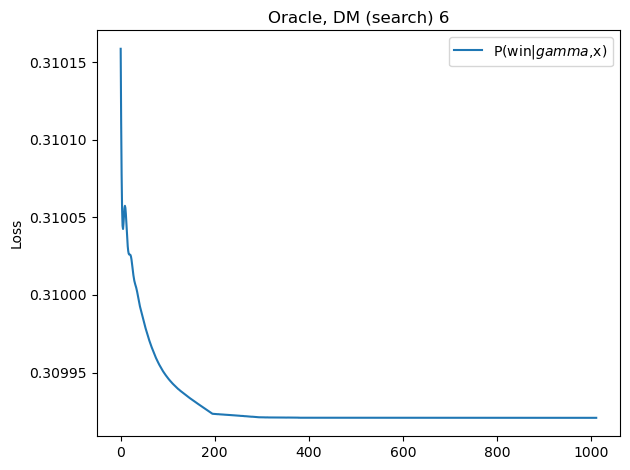

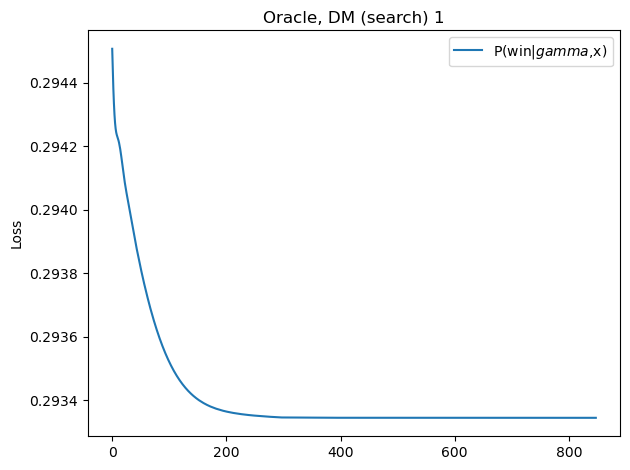

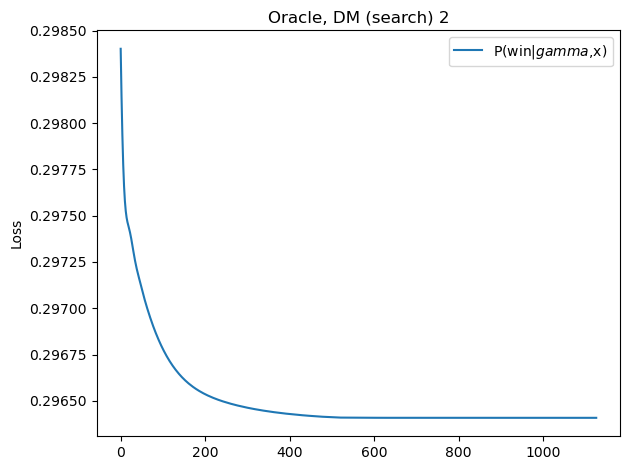

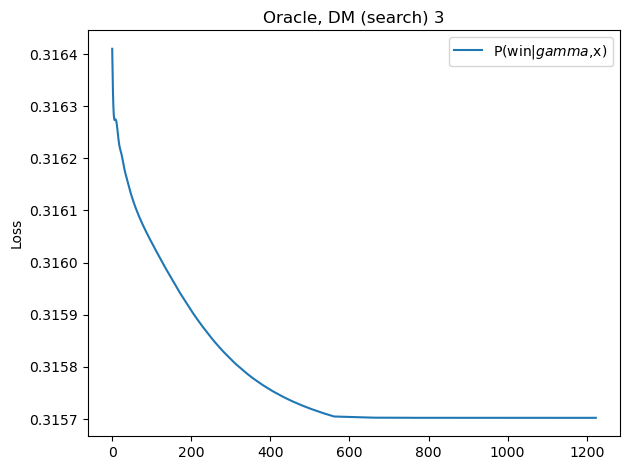

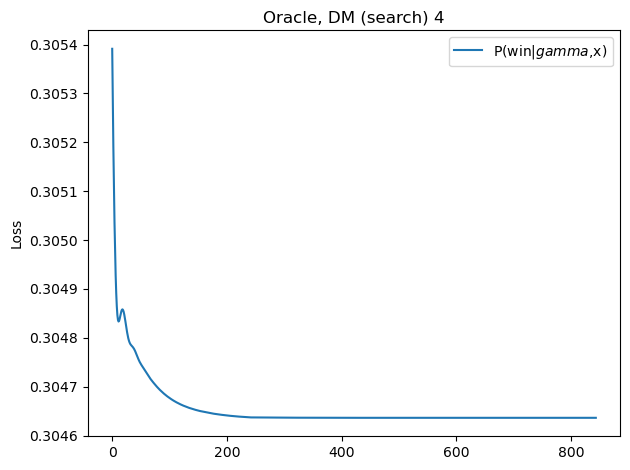

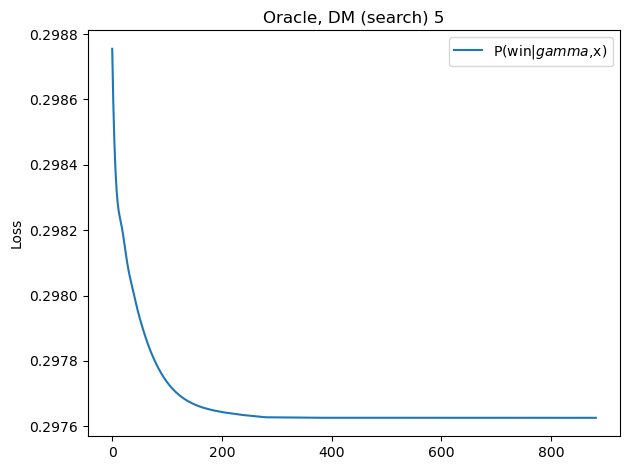

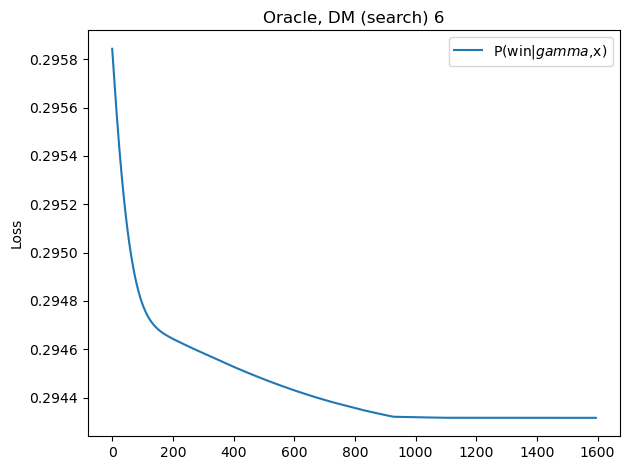

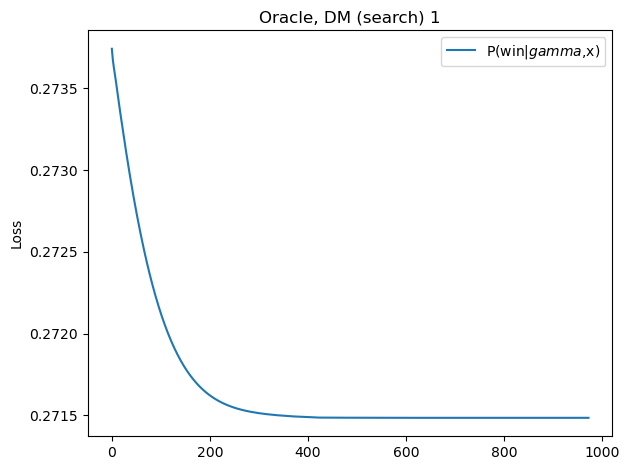

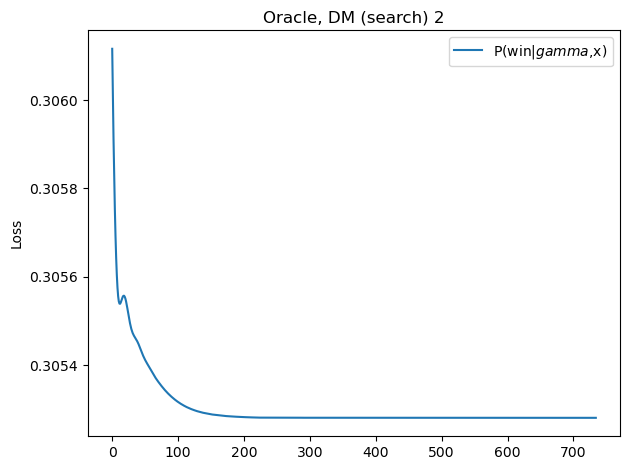

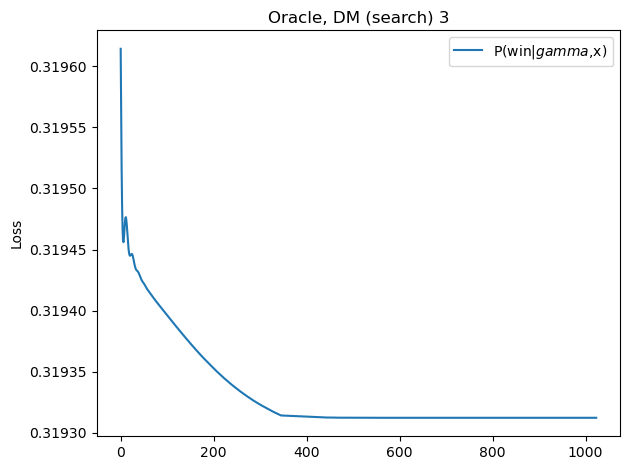

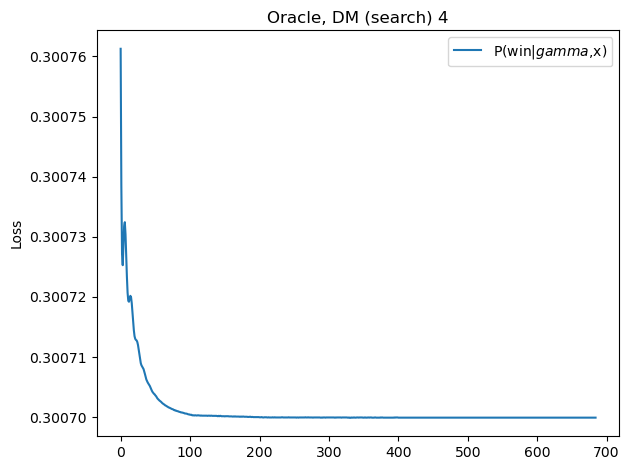

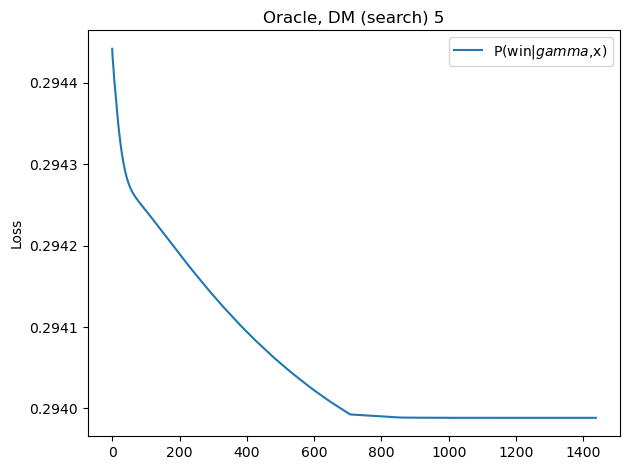

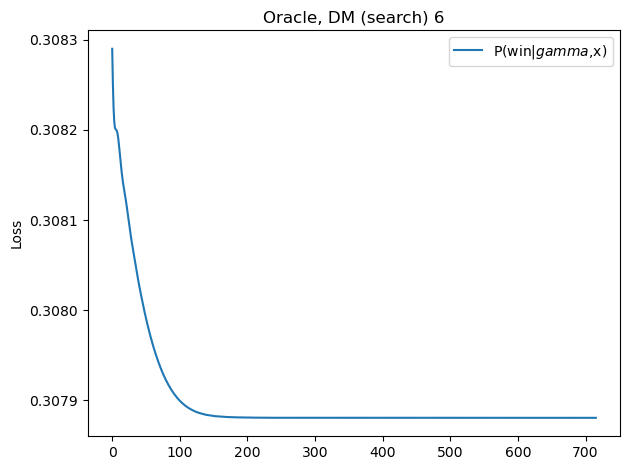

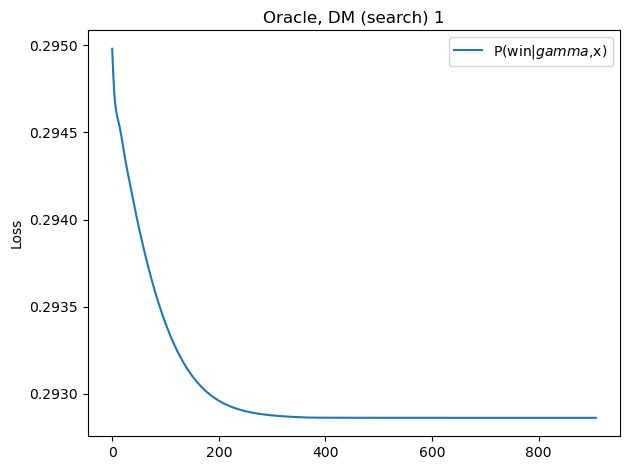

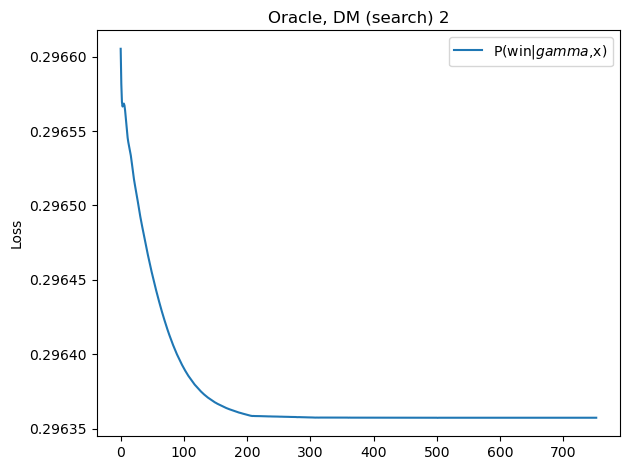

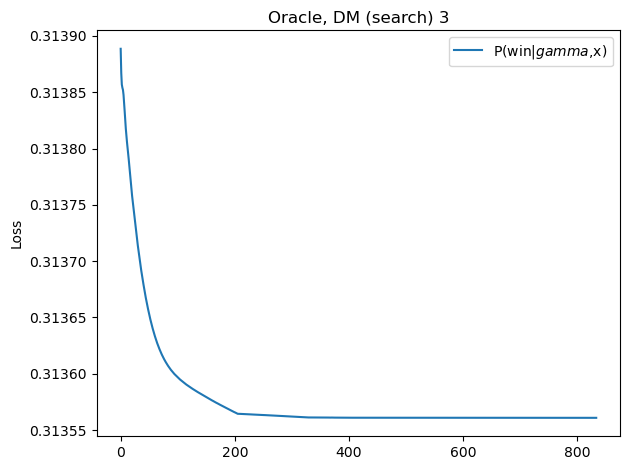

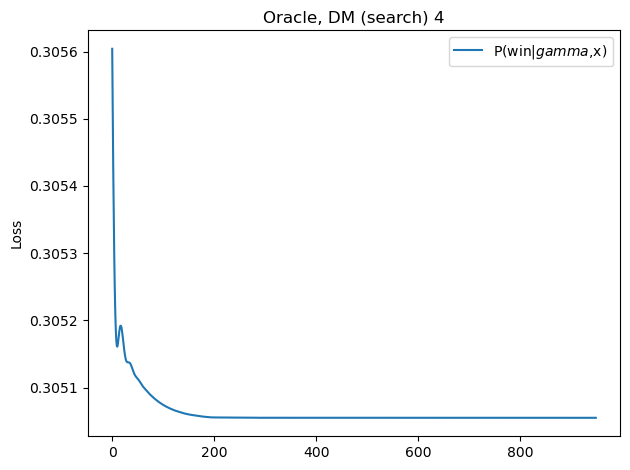

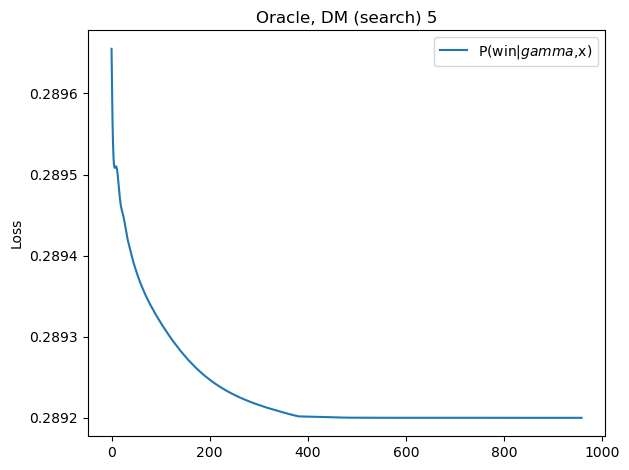

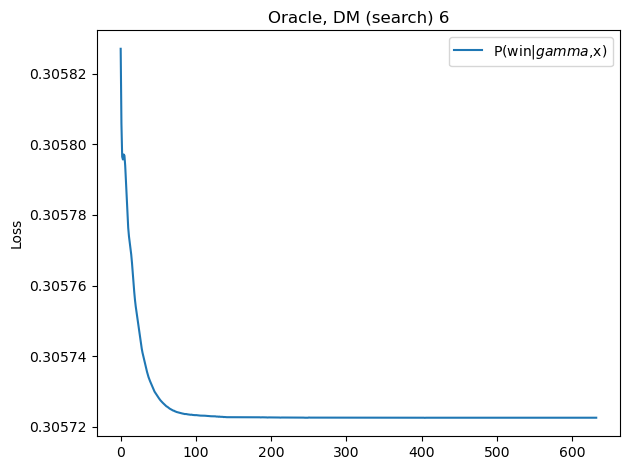

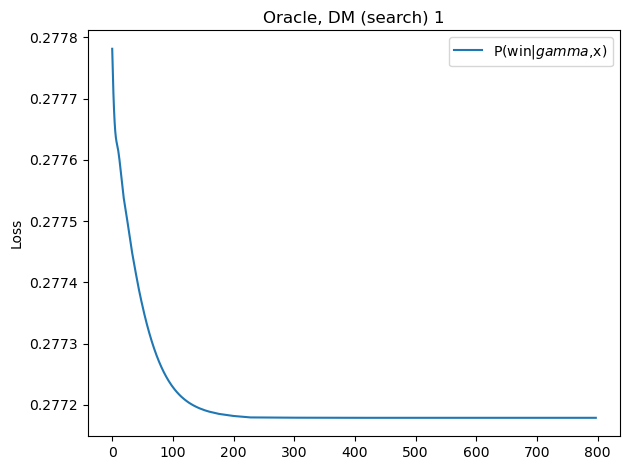

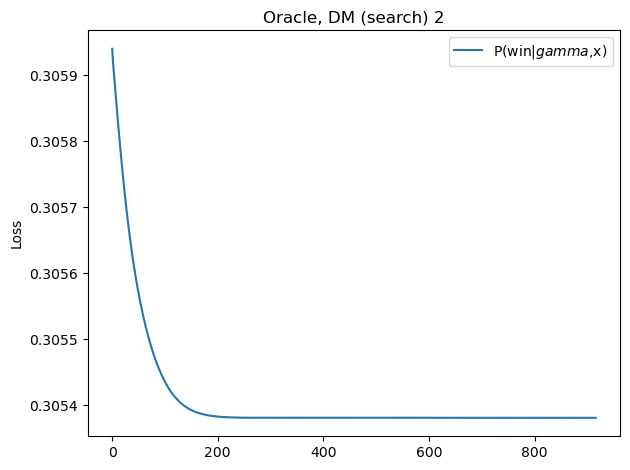

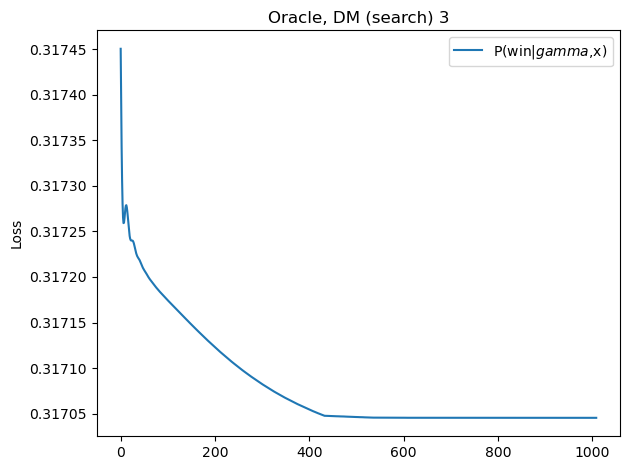

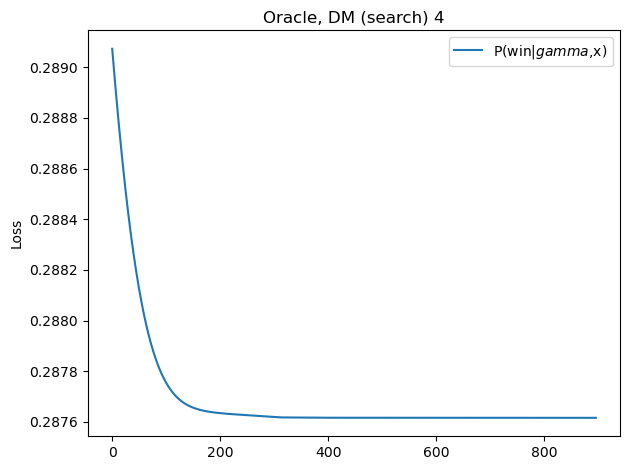

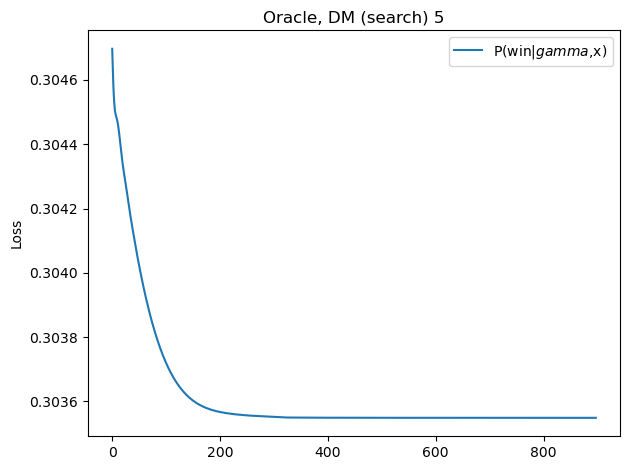

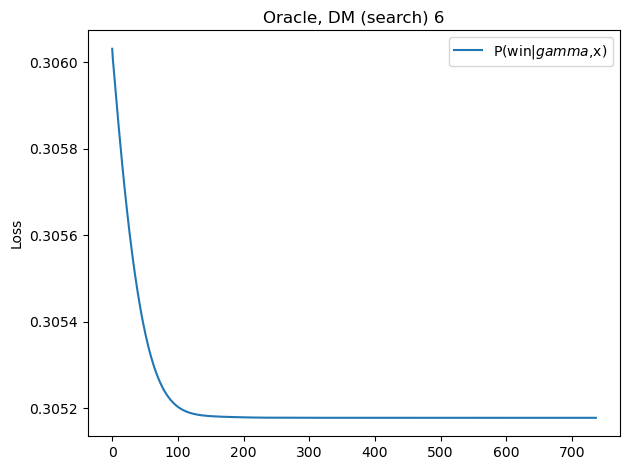

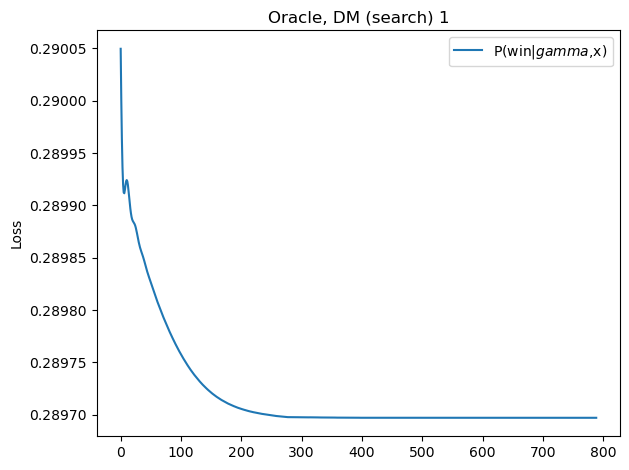

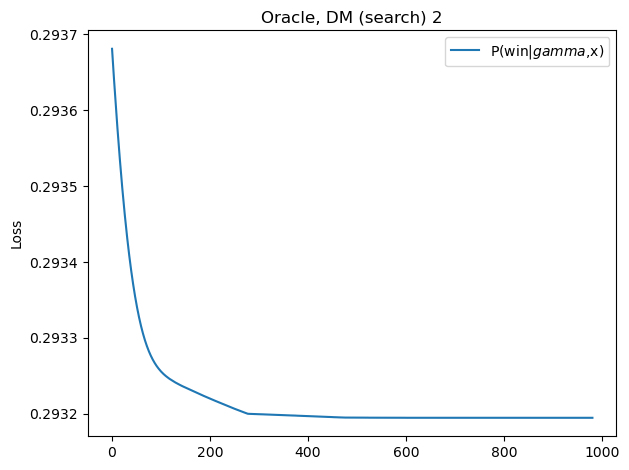

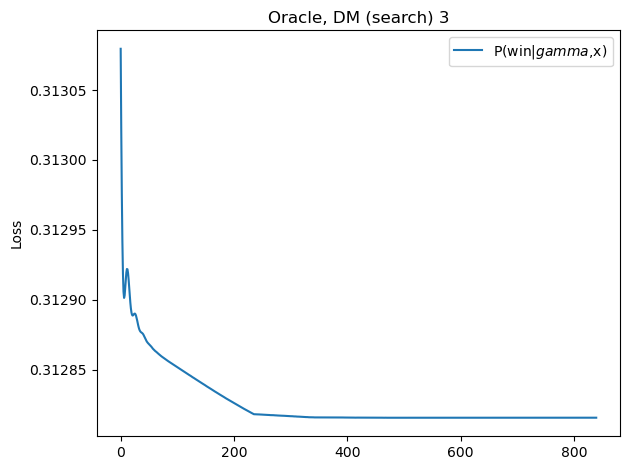

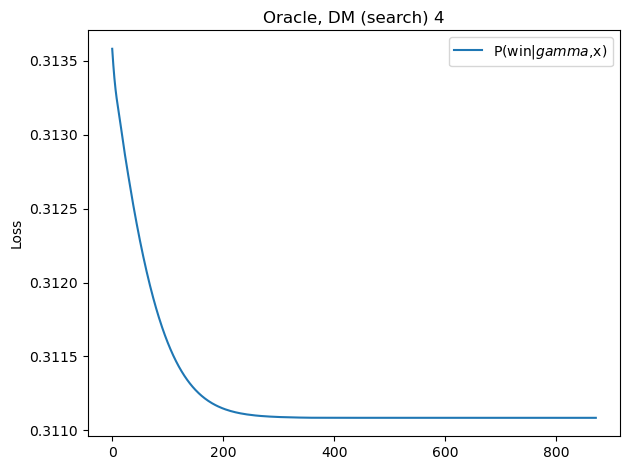

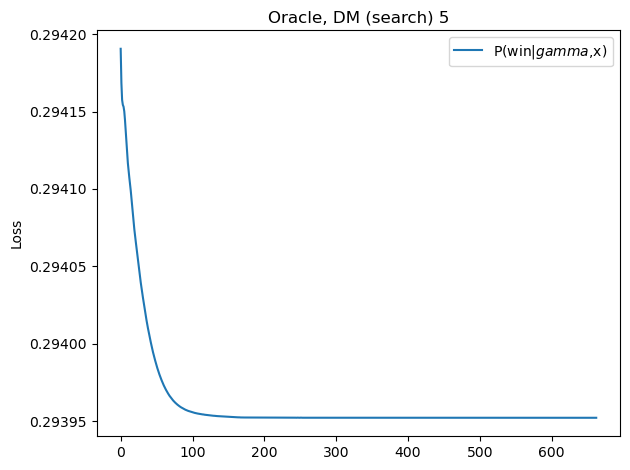

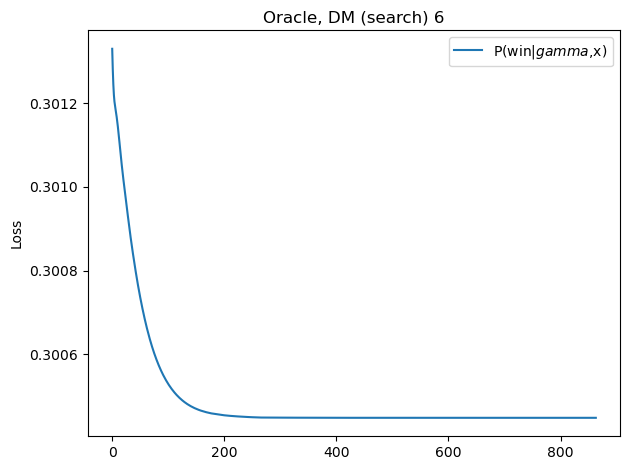

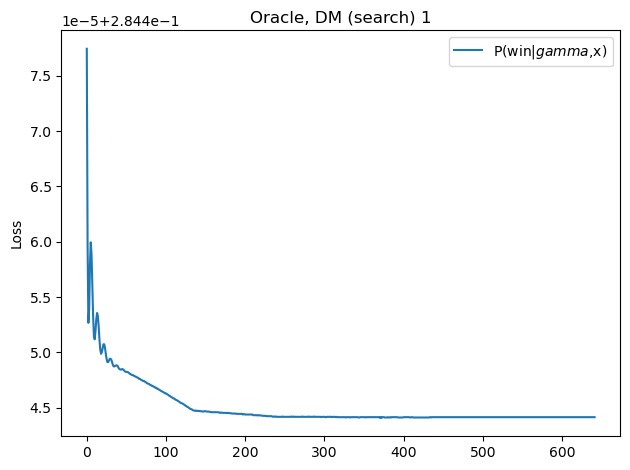

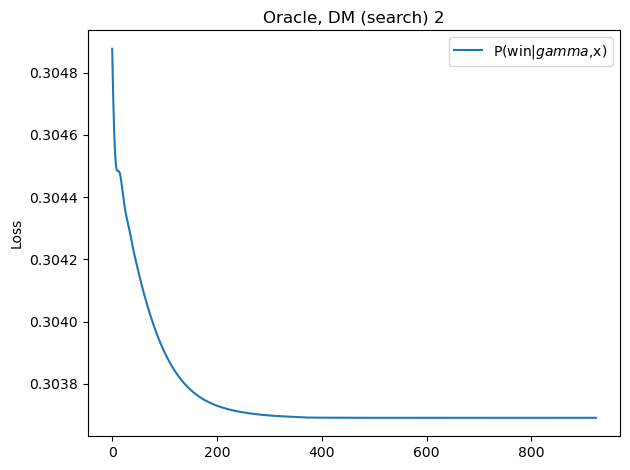

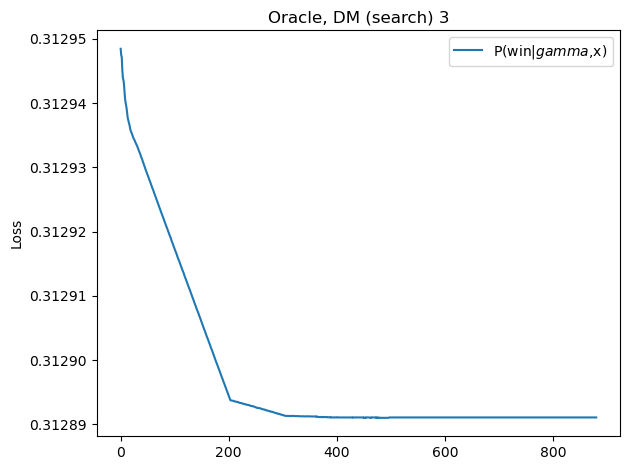

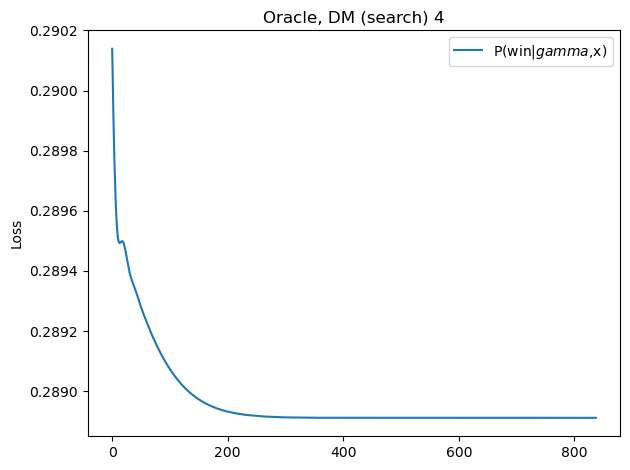

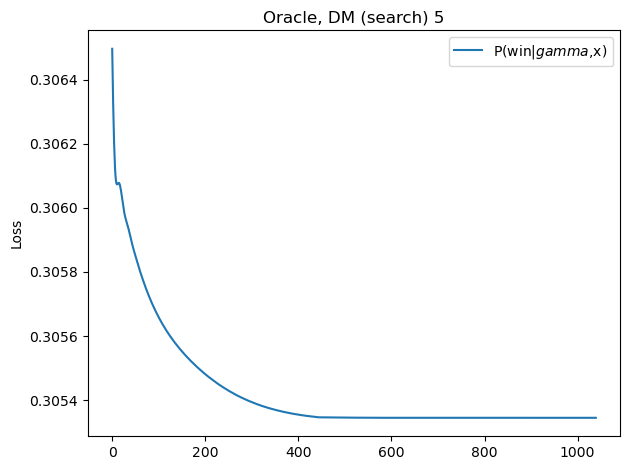

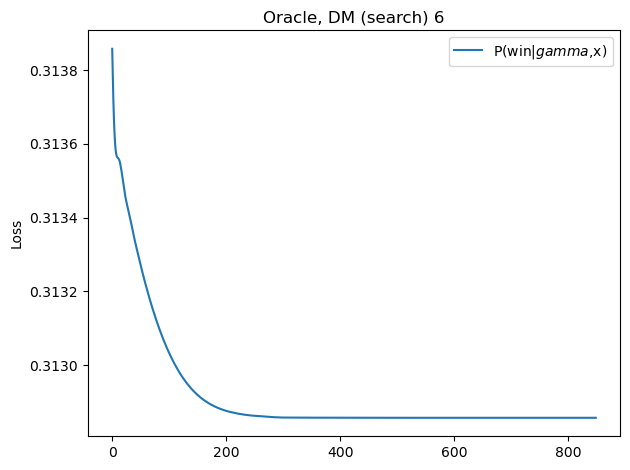

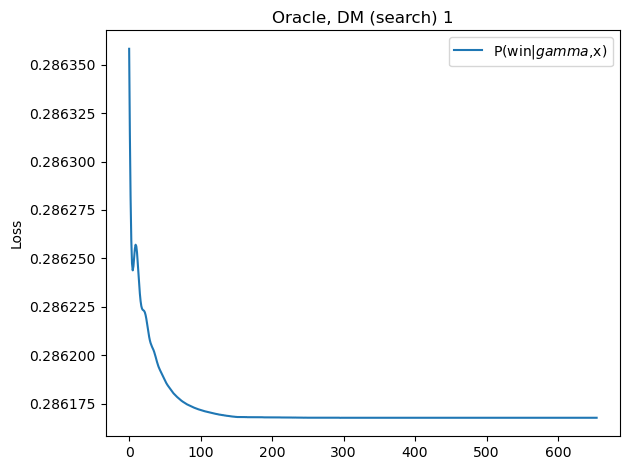

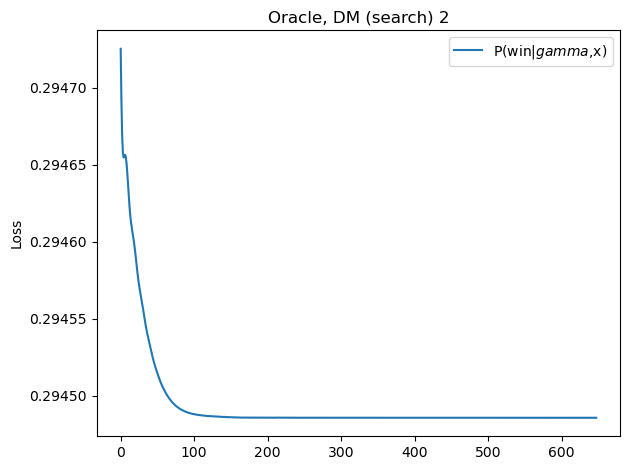

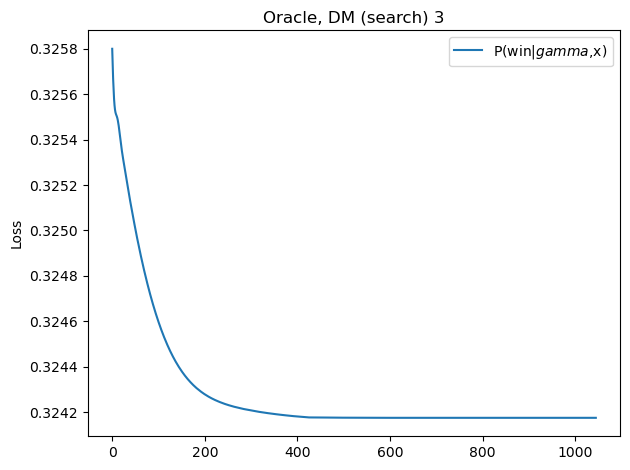

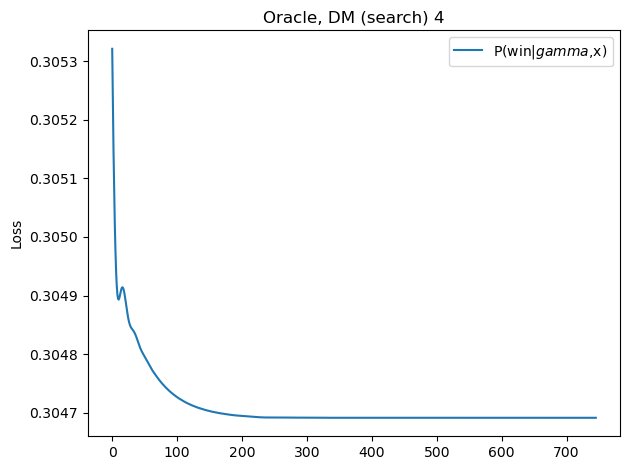

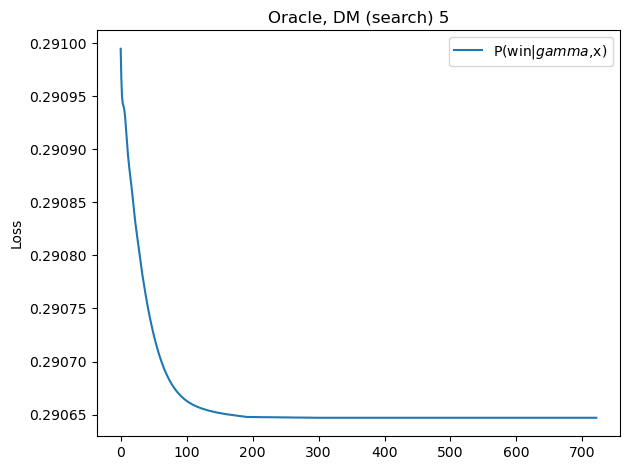

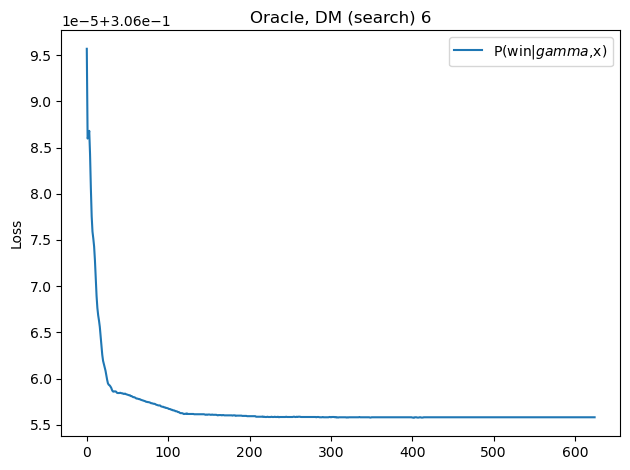

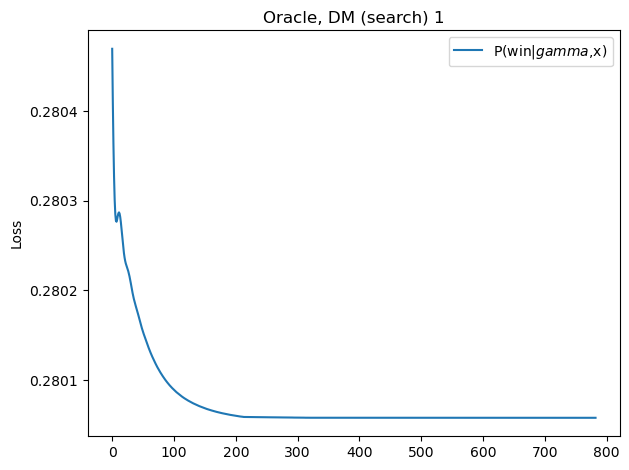

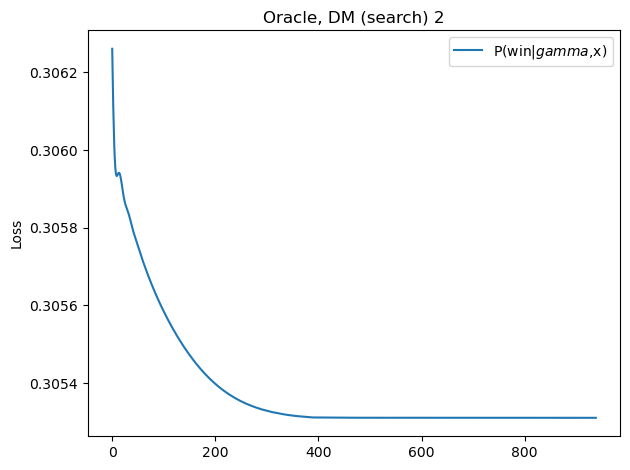

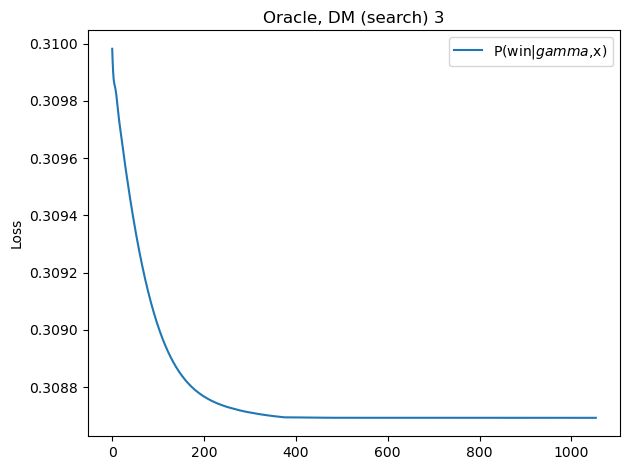

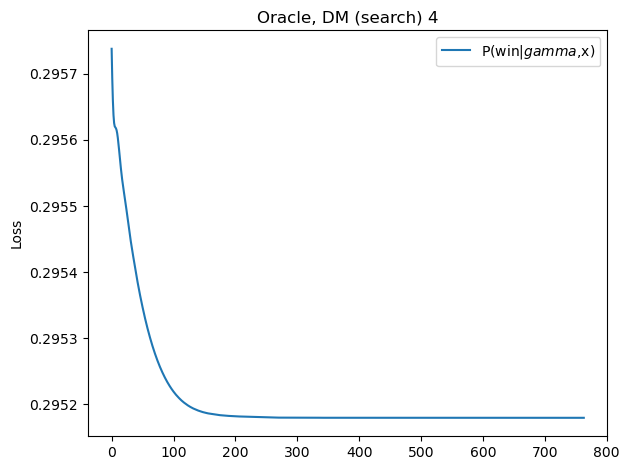

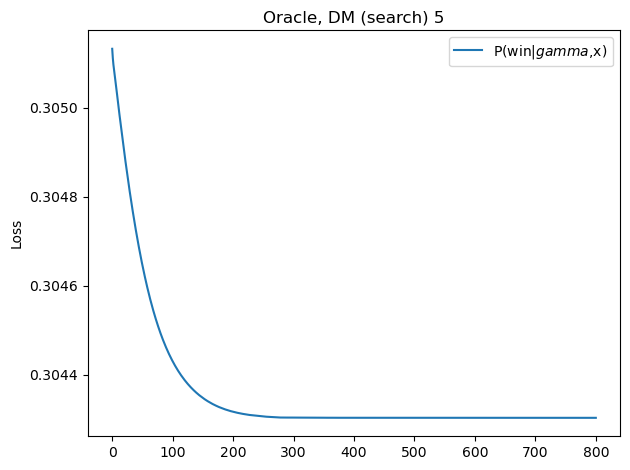

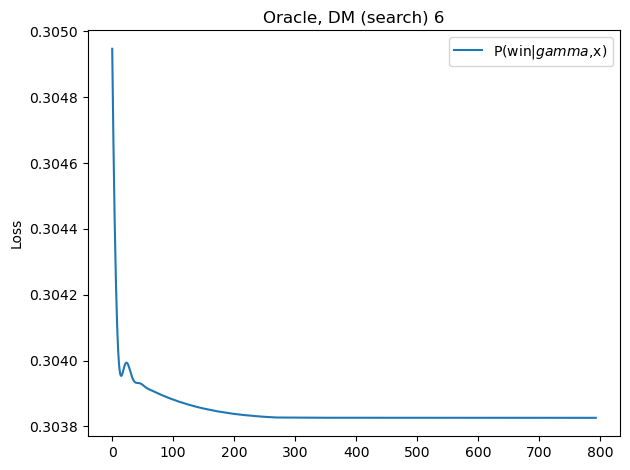

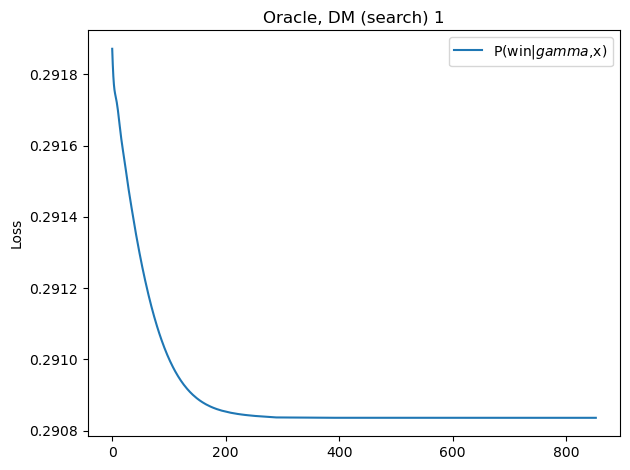

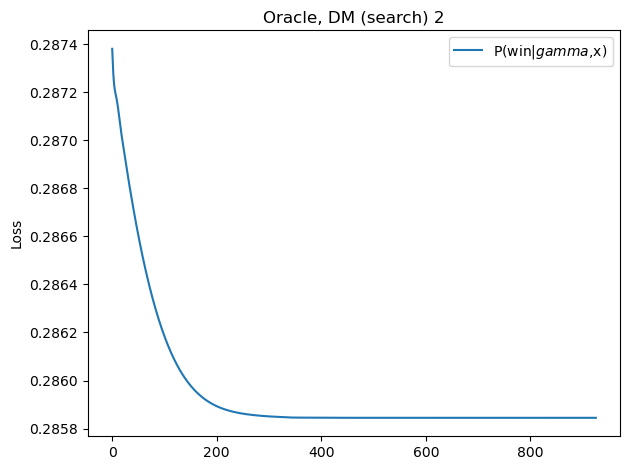

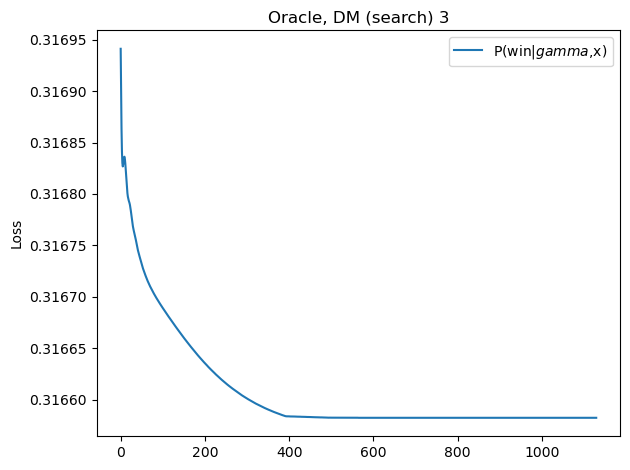

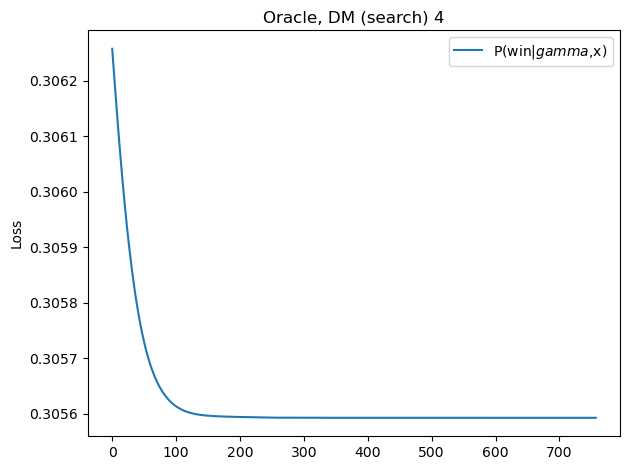

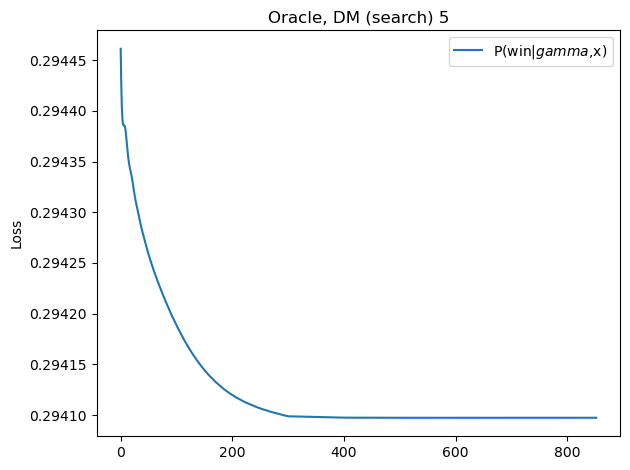

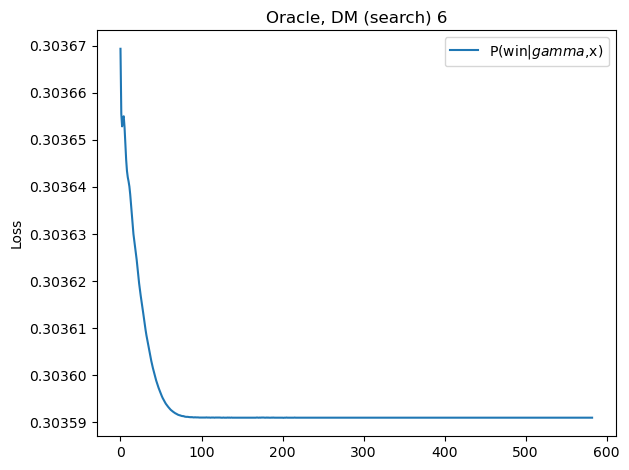

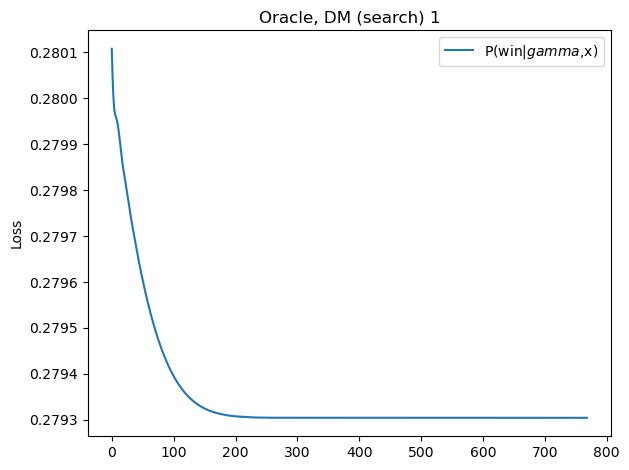

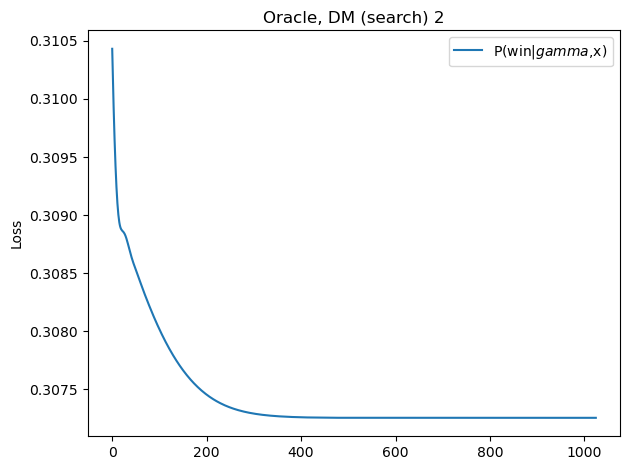

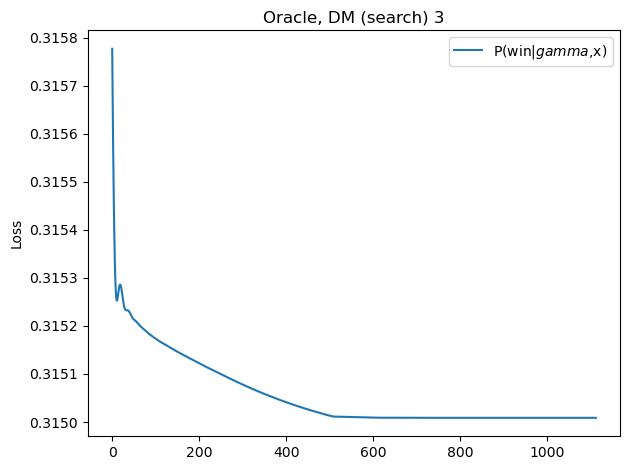

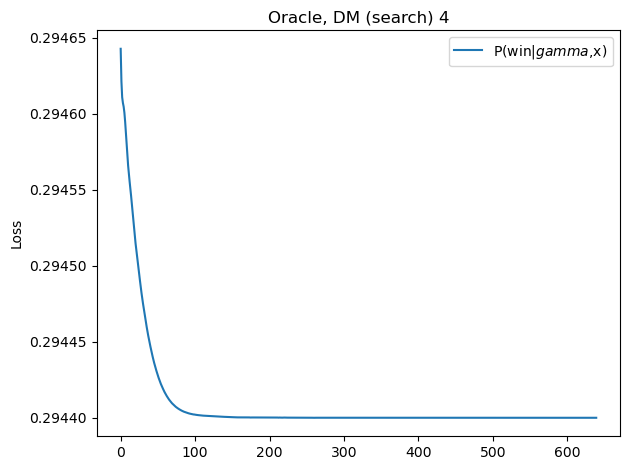

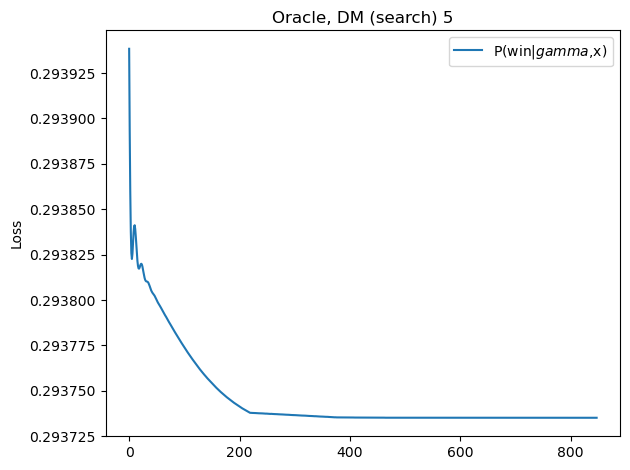

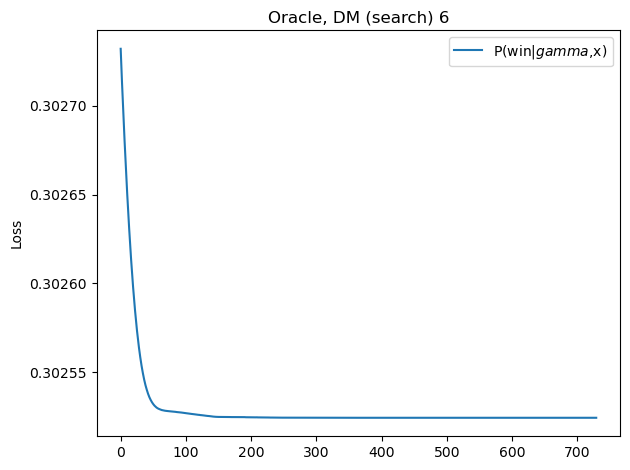

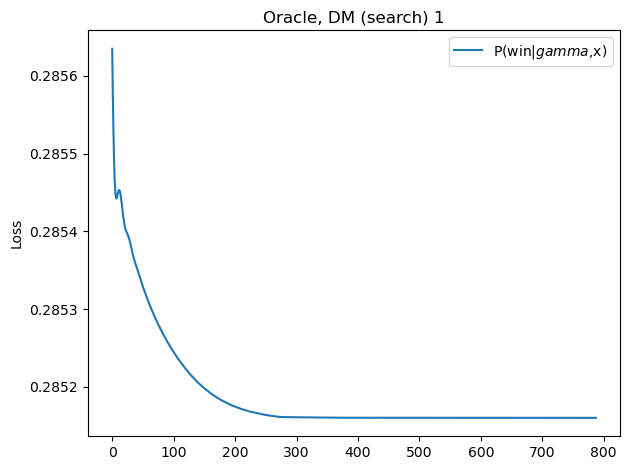

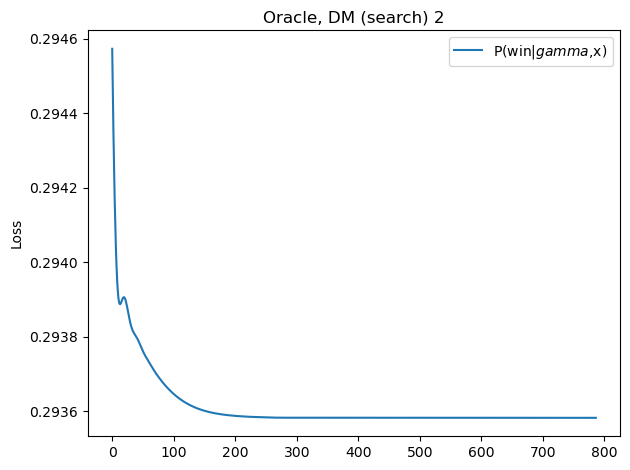

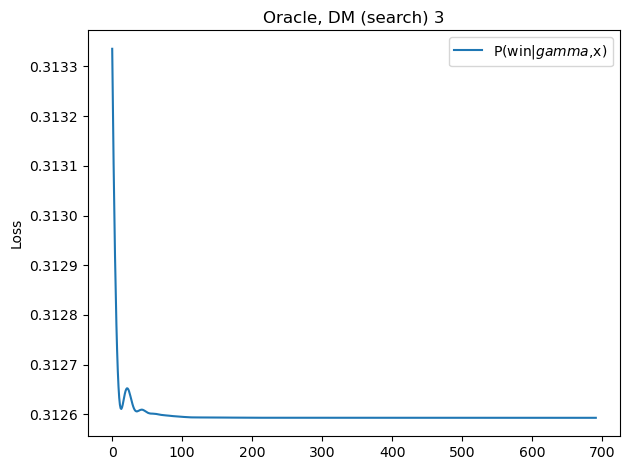

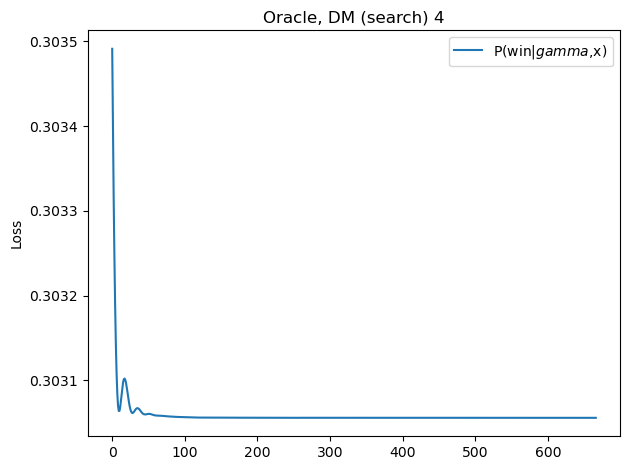

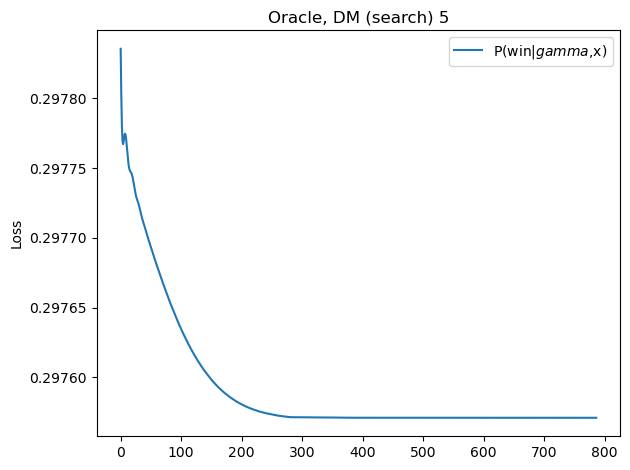

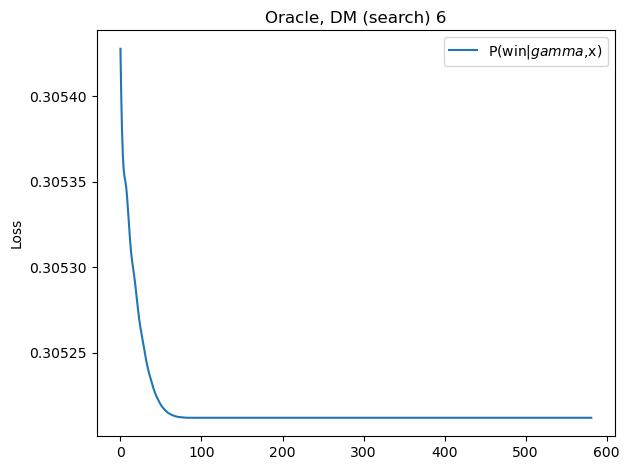

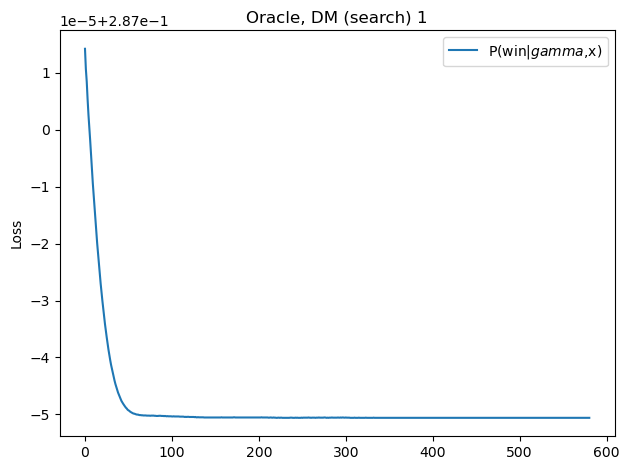

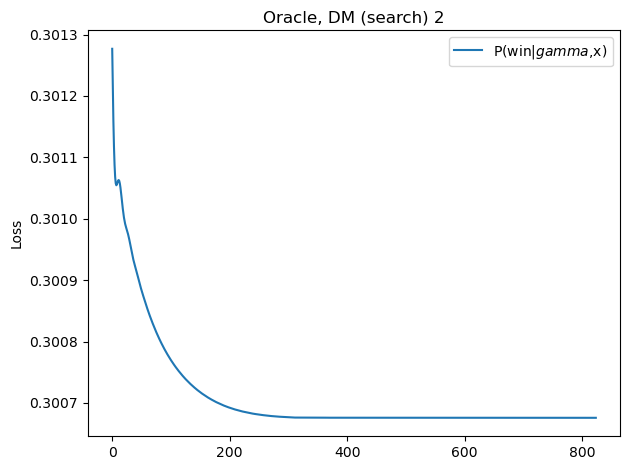

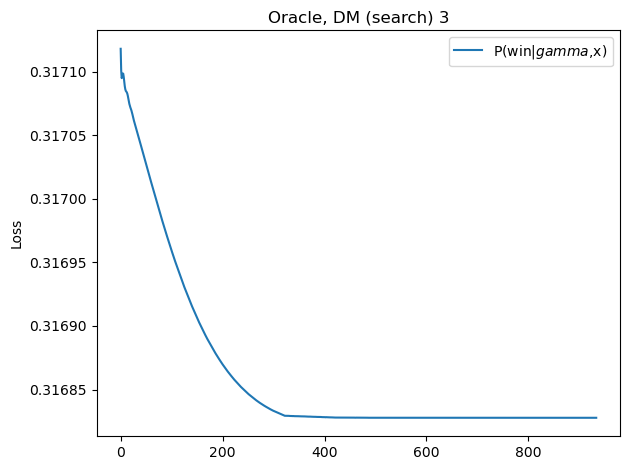

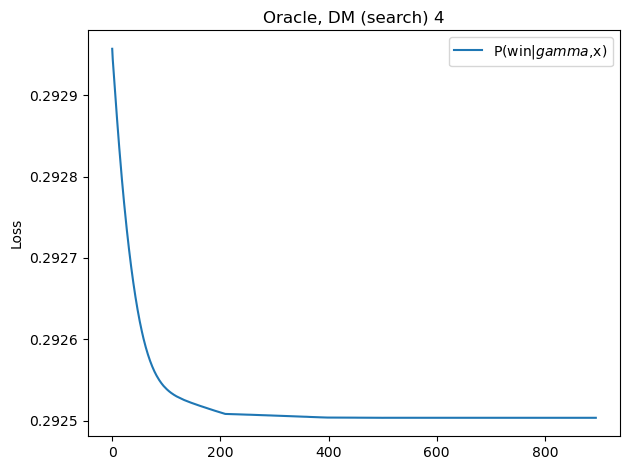

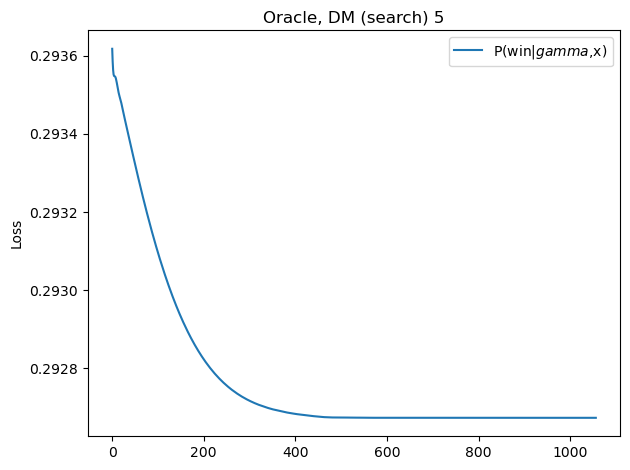

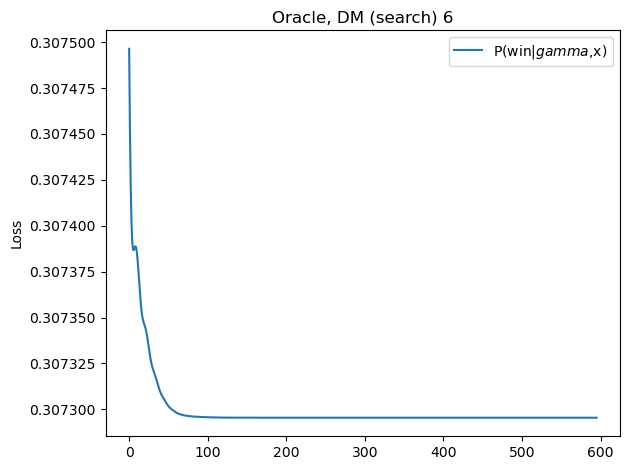

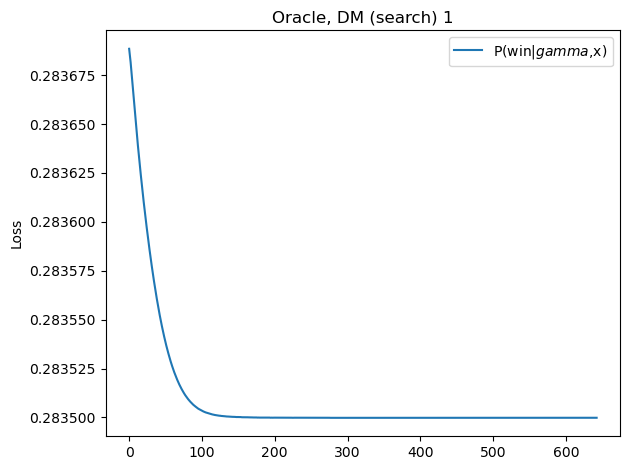

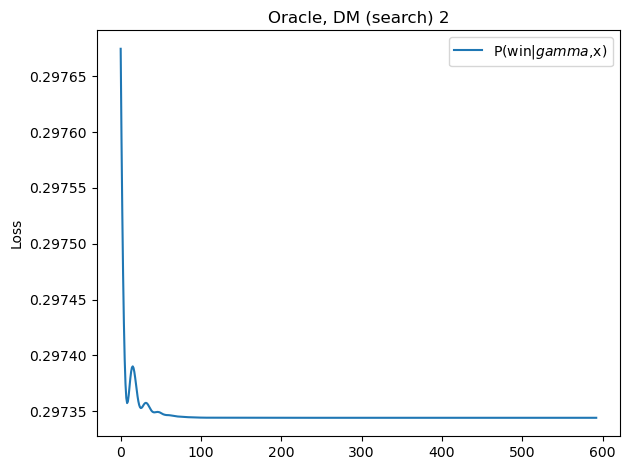

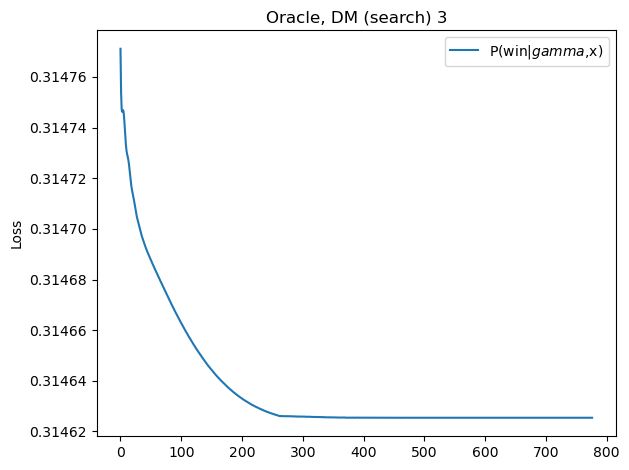

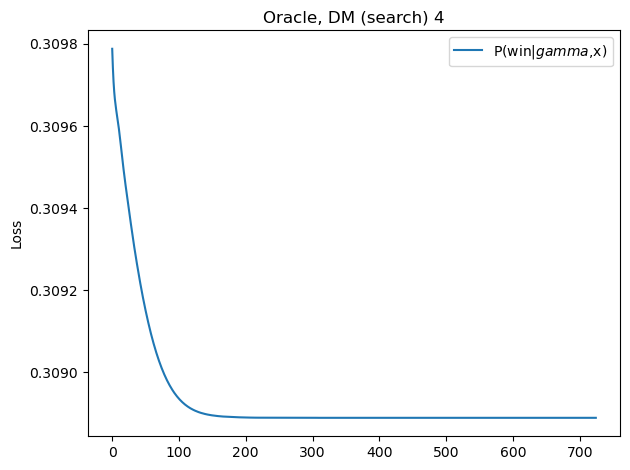

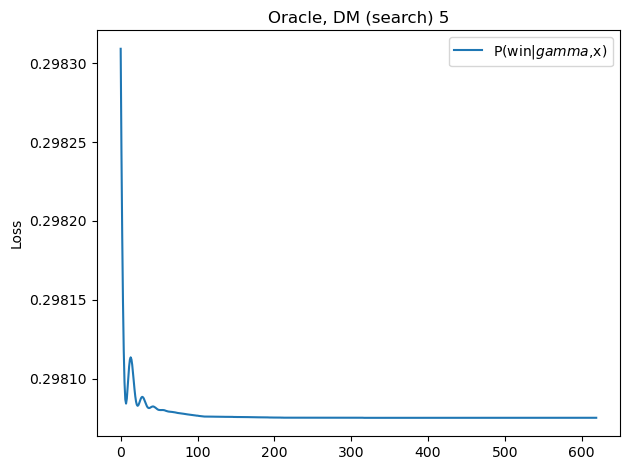

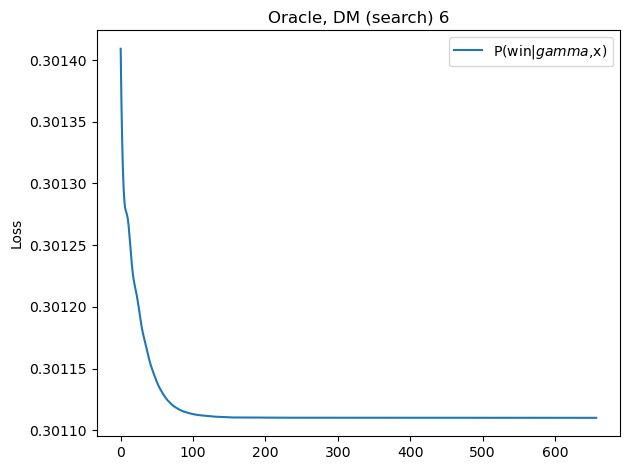

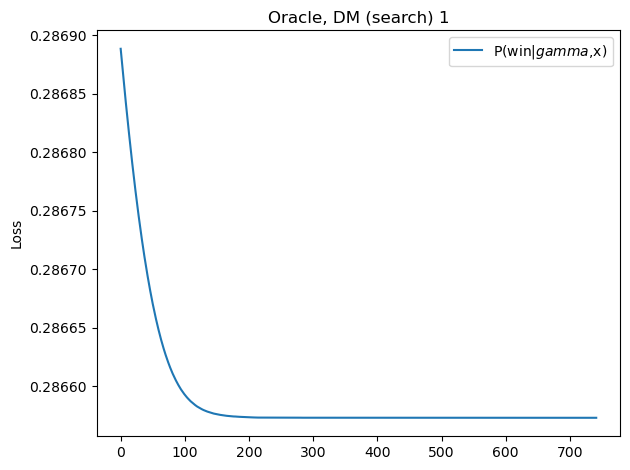

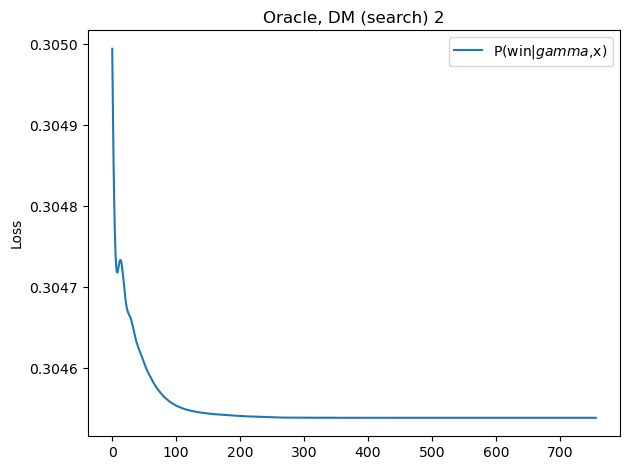

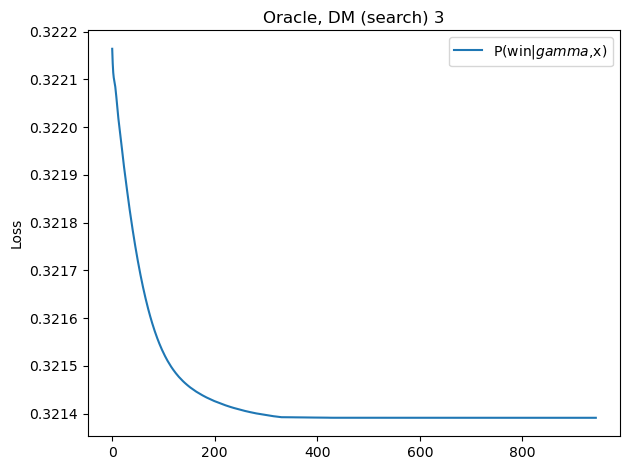

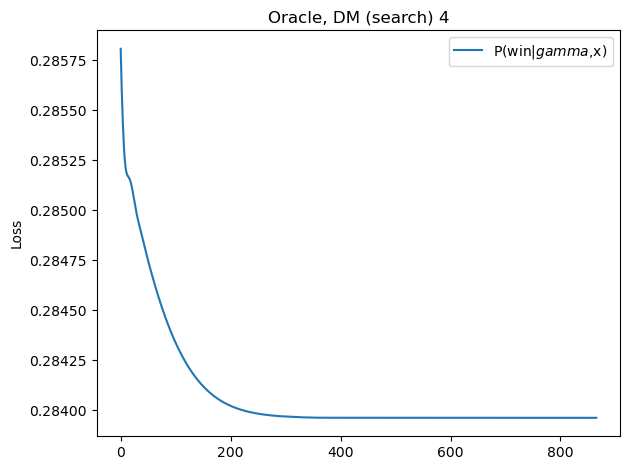

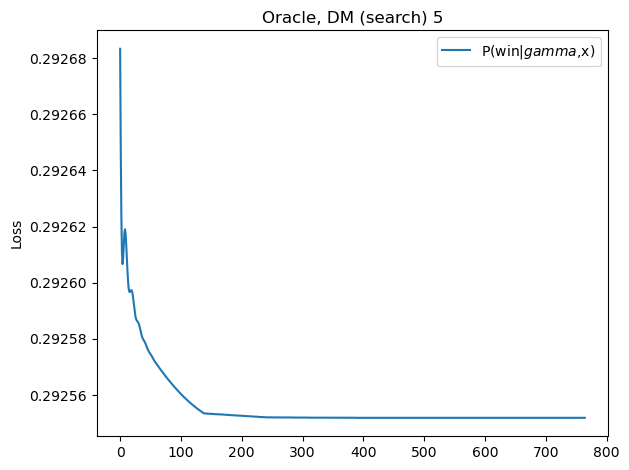

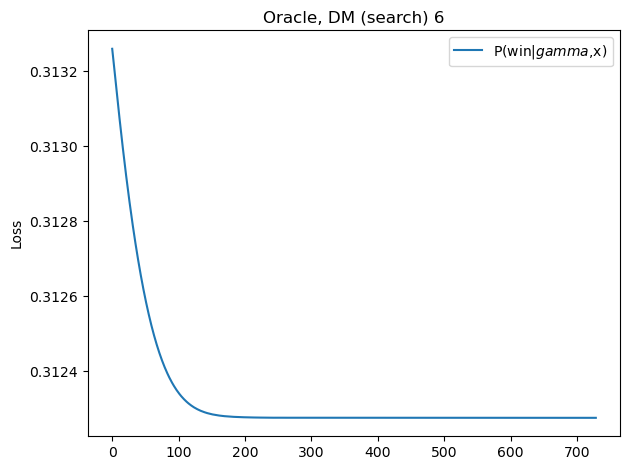

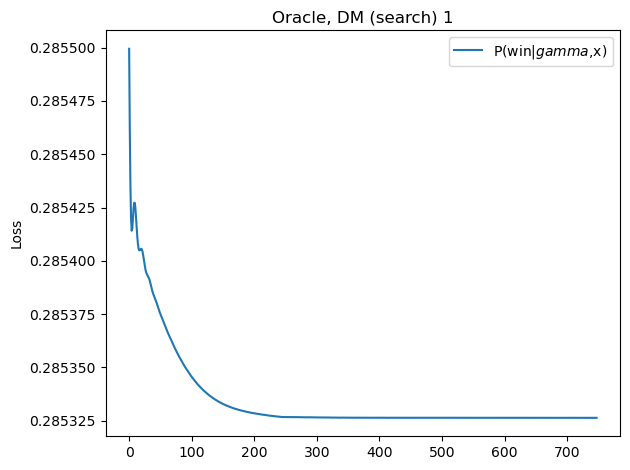

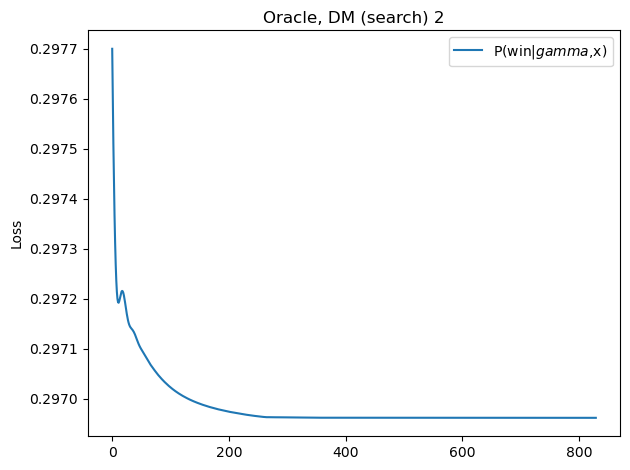

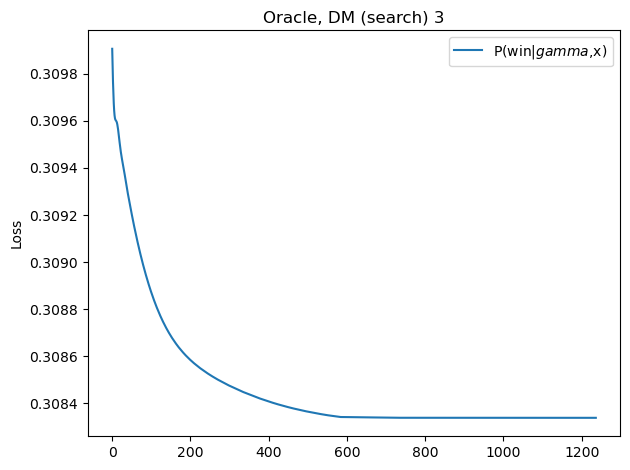

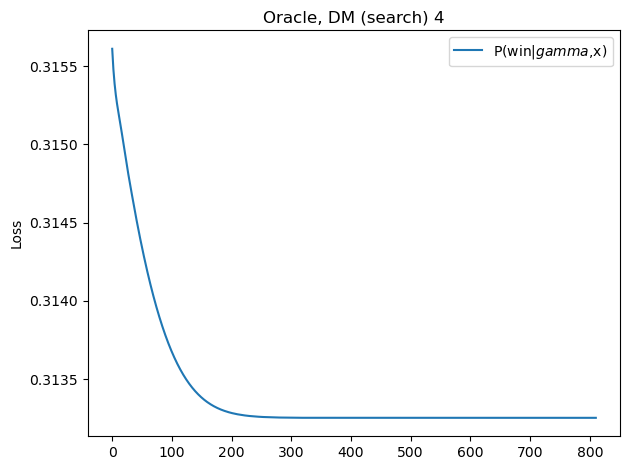

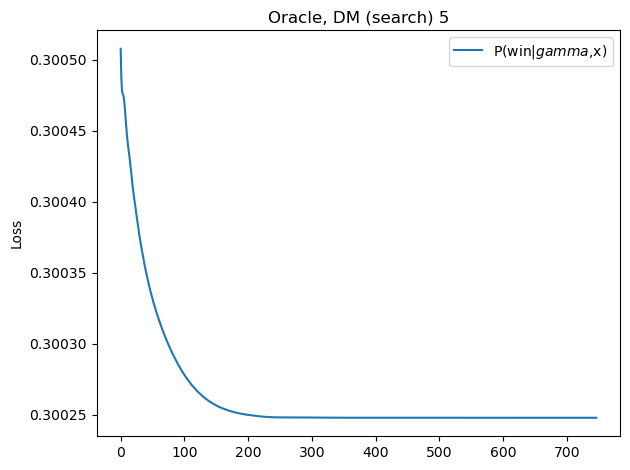

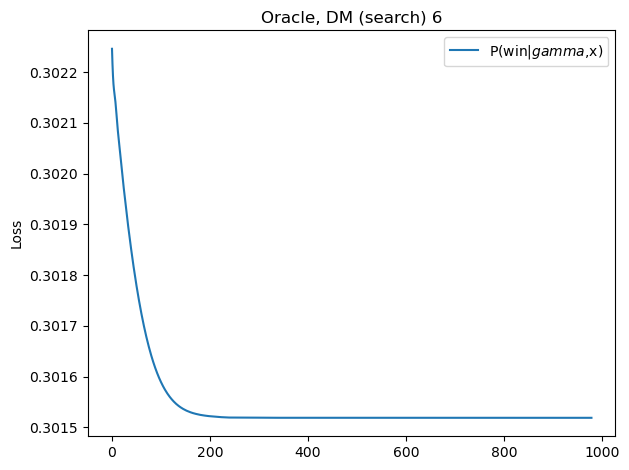

In [4]:
shaded_revenue, shaded_welfare, shaded_surplus = run_repeated_auctions()

In [5]:
def set_truthful_bidders(agent_configs):
    for agent_config in agent_configs:        
        agent_config['bidder'] = {
            'type': 'TruthfulBidder',
            'kwargs': {}
        }
set_truthful_bidders(agent_configs)
truthful_revenue, truthful_welfare, truthful_surplus = run_repeated_auctions()

  0%|          | 0/20 [00:00<?, ?it/s]

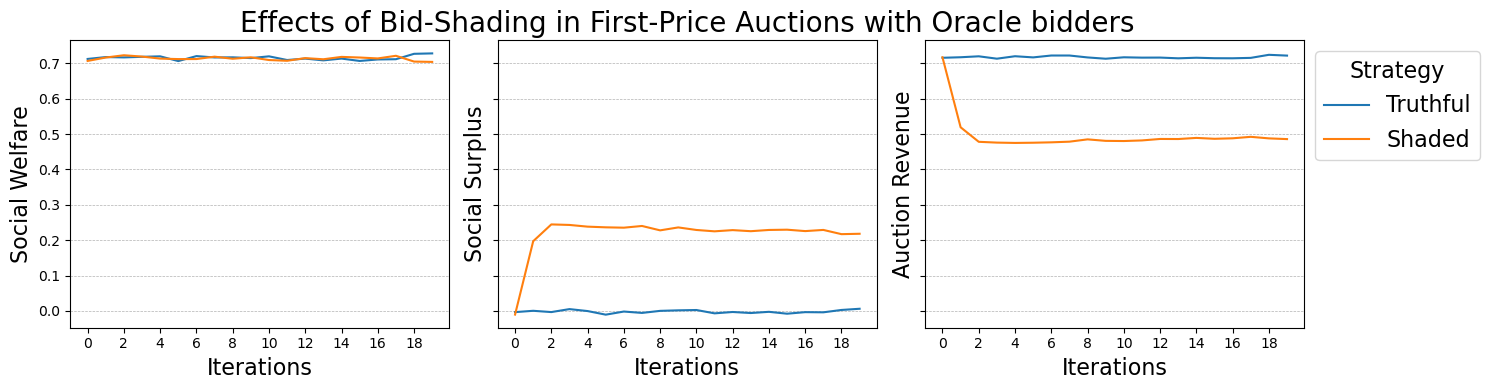

In [6]:
fontsize=16
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(15,4))

axes[0].plot(truthful_welfare, label=f'Truthful')
axes[1].plot(truthful_surplus, label=f'Truthful')
axes[2].plot(truthful_revenue, label=f'Truthful')

axes[0].plot(shaded_welfare, label=f'Shaded')
axes[1].plot(shaded_surplus, label=f'Shaded')
axes[2].plot(shaded_revenue, label=f'Shaded')

axes[1].set_title('Effects of Bid-Shading in First-Price Auctions with Oracle bidders', fontsize=fontsize+4)

for i in range(3):
    axes[i].set_xlabel('Iterations', fontsize=fontsize)
    axes[i].set_xticks(list(range(0,len(truthful_revenue),2)))
    axes[i].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    
axes[0].set_ylabel('Social Welfare', fontsize=fontsize)
axes[1].set_ylabel('Social Surplus', fontsize=fontsize)
axes[2].set_ylabel('Auction Revenue', fontsize=fontsize)

legend = axes[2].legend(loc='upper left',
                        bbox_to_anchor=(1.0, 1.0),
                        fontsize=fontsize)
legend.set_title('Strategy', prop={'size': fontsize})
fig.tight_layout()

plt.show()

The leftmost plot shows social welfare (the sum of generated welfare over all participants in the auction).
Whether participants shade their bids (or not) does not have affect welfare: indeed, the value that is generated by the ads that are shown remains unchanged.

The middle plot shows social surplus.
Bidding truthfully in a first-price auction gives an expected surplus of 0.
As bidders start to shade their bids, we can see that bidders succesfully generate surplus.

The rightmost plot shows revenue for the auctioneer.
When bidders bid truthfully, the monetary value for all generated welfare goes to the auctioneer.
As bidders start to shade their bids, we can see that revenue diminishes as surplus increases.